# Predicting outcome in breast cancer patients using gene expression

### Contents

- [Section 1: Report](#report)
- [Section 2: Import, cleaning and data dictionary](#section2)
- [Section 3: EDA](#section3.1)
    - [3.1: Relationship between clinical variables and prognosis](#section3.1)
    - [3.2: Relationship between clinical variables and each other](#section3.2)
    - [3.3: Breakdown of treatments](#section3.3)
    - [3.4: Relationship between gene expression and prognosis](#section3.4)
- [Section 4: Modelling](#section4)
    - [4.1: Using clinical variables only](#section4.1)
    - [4.2: Using gene expression only](#section4.2)
    - [4.3: Using clinical variables and gene expression](#section4.3)
- [Section 5: Visualisation](#section5)

<a name="report"></a>
## 1: Full report and next steps

**A copy of each section is found as a summary above the code for easier reading.**


**(Section 2)** The breast cancer data was collected by the Netherlands Cancer Institute (NKI) and published on Nature 415 by van’t Veer et al. in 2002. It included clinical features but also gene expression levels; these represent how active genes and those that might contribute to cancer by being over-active or under-active. 

A cleaned version of this dataset was found on dataworld.com which was imported into a Pandas dataframe. It included expression levels of the 1554 most variable genes and 17 clinical features for 272 patients. A data dictionary was constructed by researching measures for breast cancer studies and by using the readme file associated with the original uncleaned dataset.

**(Section 3.1)** The average patient was 44 years old and had grade 2 histopathological type 1 cancer with a tumour diameter of 23mm. 28% of the patients died; there was a positive correlation between the event of death and variables known to be associated with poor prognosis (tumour diameter, number of positive nodes, tumour grade), but a negative correlation between age and event death, which was unexpected given that cancer is an age-associated disease. 

There were strong negative correlations between event death and a) the time between first treatment and follow-up and b) the time between first treatment and recurrence; the longer someone had survived or been disease free, the less likely they were to die. There is some argument to removing these variables for two reasons. Firstly because there is a lack of patients who – at the time of the most recent assessment – had survived breast cancer that had onset less than 5 years ago, causing any model to be heavily weighted to predict death for newly diagnosed patients. Secondly, the interval before recurrence would not be a relevant variable for these newly diagnosed patients with no prior history. These variables would therefore have to be removed and the model re-learned for use in a practical real-world scenario. 

In general, less severe classes of angioinvasion and lymphocytic infiltration negatively correlated with event death whereas more severe classes positively correlated, but these relationships were weak and nearly always statistically insignificant. There was no correlation between each kind of treatment and outcome. The lack of strong correlations between clinical variables and the event of death are concurrent with the observation that breast cancer patients with the same stage of disease can have markedly different outcomes, highlighting the need to incorporate genetic or environmental variables for better prognosis.

**(Section 3.2)** There were a number of interesting relationships between clinical variables; when comparing the three options of treatment, chemotherapy correlated strongly with the number of positive nodes, amputation correlated with tumour diameter and hormonal therapy correlated with age. It is logical to suggest that this might reflect the appropriateness of each treatment ie. doctors choose to administer chemotherapy when the cancer is widespread but choose to amputate the breast when a tumour is large. 

There were negative correlations between classes originating from the same dummy variables; this was expected because observations belong to either one class or the other. There was a relationship between the classes of lymphocytic infiltration and tumour grade, whereby severe classes correlated with each other and weak classes correlated with each other, but severe classes negatively correlated with weak classes eg. lymphocytic infiltration class 1 (-/-) against tumour grade 3. This is logical because the amount of lymphocytic infiltration is a contributing factor to the severity of a cancer during the grading process, so higher levels of lymphocytic infiltration are more likely to be seen in grade 3 cancers.

**(Section 3.3)** Two-thirds of the patients had received a form of treatment: chemotherapy, hormonal therapy and/or an amputation. Of these treated patients, the proportion of death was highest (40%) in the subgroup that had only received an amputation. This was statistically significant when compared to the baseline frequency of 28% at the p=0.05 level. Given that amputation is a common solution for early-stage cancer, this might represent patients who could have additionally benefitted from more rigorous treatment like chemotherapy or hormonal therapy.

**(Section 3.4)** The shape, centre and spread of expression data varied across different genes. This complexity was encouraging as it provides depth for explaining the underlying predictive pattern. The least varied gene in the dataset had a standard deviation of 0.13; this represents the cutoff for genes to be considered in the dataset (the top ~1550 varying genes out of thousands). There was also a range in the amount of linear correlation between gene expression and event death. Around half of the genes correlated weakly (pearson coefficient between -0.1 and 0.1) and are likely to be uninformative in linear methods such as lasso logistic regression, but may be informative in a decision tree if the underlying process is non-linear.

**(Section 4.1)** Initially, the 17 clinical features were used on their own to learn a model for predicting event death. This represents the prediction that is made without genetic information; an automated version of a clinician’s prognosis. An accuracy of 92% was achieved using a decision tree, which was much higher than the baseline of 71.7%. However this accuracy dropped to 76% when the time-related features were removed, which represents the accuracy of diagnosis for first-time patients.

**(Section 4.2)** Modelling using gene expression variables produced accuracy scores that matched or exceeded those obtained using the predictive clinical variables, in all cases but KNN. This was encouraging as it signifies that gene expression adds as much value in predictive power as the clinical features we already use for diagnosis. Most notably, an accuracy score of 85% was achieved through generating feature interactions for modelling genes with logisitc regression, which was much higher than the best model (76%) when using predictive features. This score could additionally be improved by including all genes in the dataset instead of just the top most varying genes, and by generating interactions between triplets of genes instead of just pairs of genes. However with the small dataset of 272 patients, both these approaches could lead to overfitting very easily.

**Limitations**
Some notable limitations so far include: the inability to link contigs (gene columns) with their respective gene IDs to evaluate the pathways involved or cluster according to protein sequence, only having access to the top varying genes instead of every gene measured, and the small sample size. The gene data also only provides a snapshot view of gene expression at one point in time; this reduces comparability because most patients will be at different stages of disease/recovery.


<a name="section2"></a>
## 2: Import, cleaning and data dictionary

The breast cancer data was collected by the Netherlands Cancer Institute (NKI) and published on Nature 415 by van’t Veer et al. in 2002. It included clinical features but also gene expression levels; these represent how active genes and those that might contribute to cancer by being over-active or under-active. 

A cleaned version of this dataset was found on dataworld.com which was imported into a Pandas dataframe. It included expression levels of the 1554 most variable genes and 17 clinical features for 272 patients. A data dictionary was constructed by researching measures for breast cancer studies and by using the readme file associated with the original uncleaned dataset.

In [317]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style="white")
df = pd.read_csv("nki_cleaned.csv")

In [318]:
df.head()

,patient,id,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,...,contig36312_rc,contig38980_rc,nm_000853,nm_000854,nm_000860,contig29014_rc,contig46616_rc,nm_000888,nm_000898,af067420
0,s122,18,43,False,14.817248,14.817248,False,False,True,1,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,s123,19,48,False,14.261465,14.261465,False,False,False,1,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,s124,20,38,False,6.644764,6.644764,False,False,False,1,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,s125,21,50,False,7.748118,7.748118,False,True,False,1,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,s126,22,38,False,6.436687,6.318960,False,False,True,1,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160


In [319]:
#convert eventdeath target column into binary
df.eventdeath = df.eventdeath.apply(lambda x: 1 if x == True else 0)

In [320]:
#check for missing values
import pandas_summary as ps
summary = ps.DataFrameSummary(df).summary()
summary.loc["missing",:].value_counts()

0    1570
Name: missing, dtype: int64

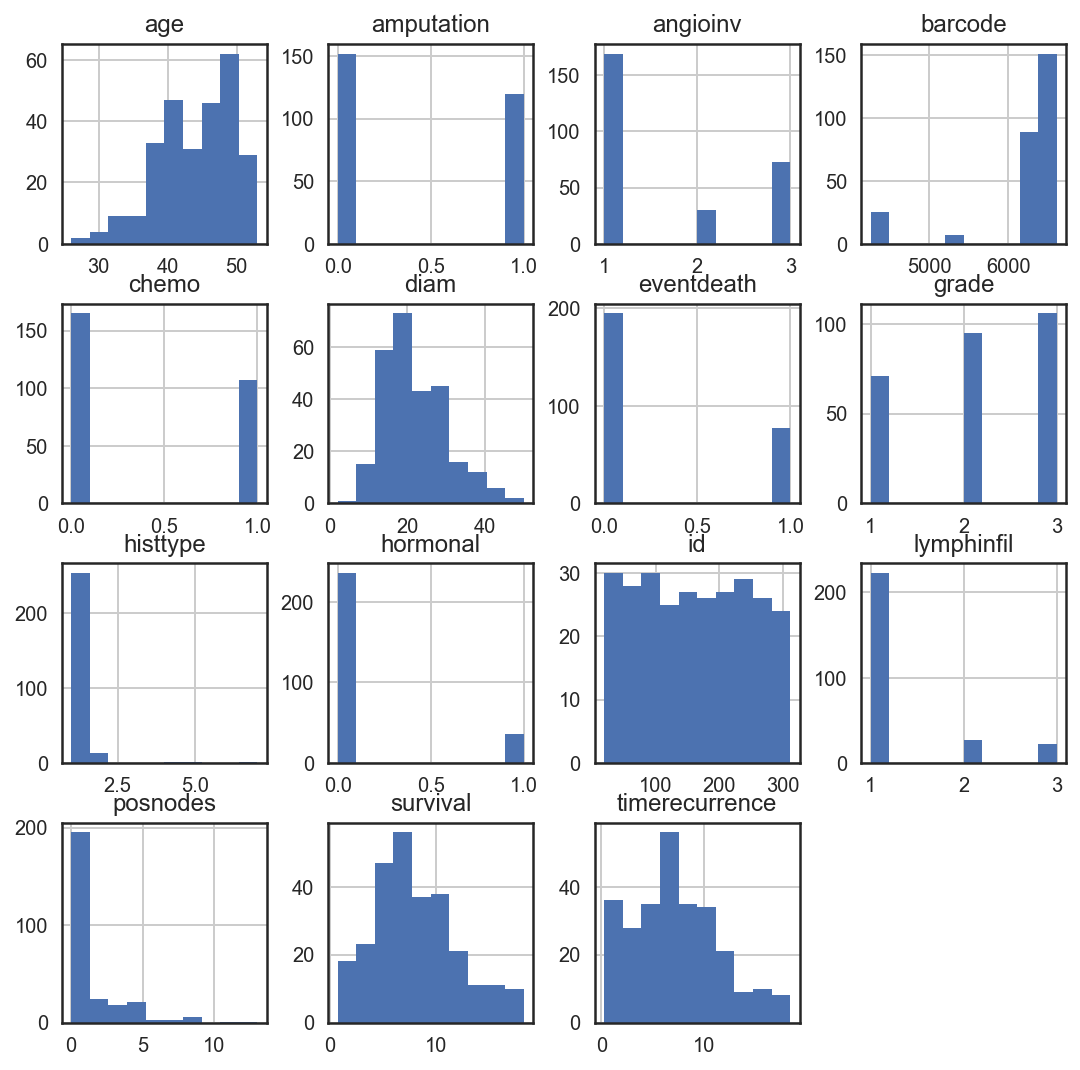

In [321]:
#subset the non-gene expression variables
subset = df.loc[:,:"barcode"]

#check distribution for outliers
subset.hist(figsize=(9,9))
plt.savefig("visuals/clinical_var_hists.jpeg")
plt.show()

Data dictionary:

| Variable | Type | Explanation|
| :-------------: |:-------------:| :-------------|
|patient | Object | Anonymised patient ID 
|id | Integer | Sample ID
|age | Integer | Age of patient
|eventdeath| Integer| 0 = no, 1 = yes for patient death
|survival | Float | Total survival interval in years between first date of treatment and last date of follow-up (if eventdeath = 0) or date of death (if eventdeath = 1)
|timerecurrence | Float | Disease free interval in years between first date of treatment and date of tumour recurrence (if eventdeath = 0) or date of death (if eventdeath = 1)
|chemo | Boolean | Treatment with chemotherapy
|hormonal | Boolean | Treatment with hormonal therapy
|amputation | Boolean | Removal of cancerous breast tissue
|histtype | Integer | Type of tumour by histopathological examination. This involves cutting a section from the tumour sample, fixing and staining it on a glass slide and analysing it under the microscope.  1 = IDC (invasive ductal carcinoma), 2 = ILC (invasive lobular carcinoma), 3 = IDC/ILC, 4 = mucinous, 5 = metaplastic, 6 = medular, 7 = tubular/lobular
| diam | Integer | Size of tumour in mm
| posnodes | Integer | Number of cancer-positive lymph nodes
|grade | Integer | Grading of tumour by histopathological examination. This involves cutting a section from the tumour sample, fixing and staining it on a glass slide and analysing it under the microscope. 1 = well differentiated (low-grade), 2 = intermediate, 3 = poorly differentiated (high-grade)
| angioinv | Integer | Presence of cancer cells in the blood vessels and/or lymphatic system. This means that the cancer is "malignant" in that it has developed a capability to spread from the breast. 1 = -/-, 2 = +/-, 3 = +/+
| lymphinfil | Integer | Level of lymphocytic infiltration. This is the infiltration of lymphocyte cells into breast cancer tumours as part of the body's antitumour immune response.  1 = -/-, 2 = +/-, 3 = +/+
| barcode | Integer | Barcode of sample
| gene id columns | Float | Expression level of gene in cancerous cells measured by DNA microarray analysis

<a name="section3.1"></a>
## 3: EDA

### 3.1 Relationship between clinical variables and prognosis


#### Clinical features vs. event death

The average patient was 44 years old and had grade 2 histopathological type 1 cancer with a tumour diameter of 23mm. 28% of the patients died; there was a positive correlation between the event of death and variables known to be associated with poor prognosis (tumour diameter, number of positive nodes, tumour grade), but a negative correlation between age and event death, which was unexpected given that cancer is an age-associated disease. 

In [340]:
#what the average patient looks like
print("Mean age: " + "%.3f" %np.mean(df["age"]))
print("Mean tumour grade: " + "%.3f" %np.mean(df["grade"]))
print("Mean tumour diameter: " + "%.3f" %np.mean(df["diam"]))

Mean age: 44.048
Mean tumour grade: 2.129
Mean tumour diameter: 22.529


In [341]:
#number of patients in survival and death groups
print df.eventdeath.value_counts()

0    195
1     77
Name: eventdeath, dtype: int64


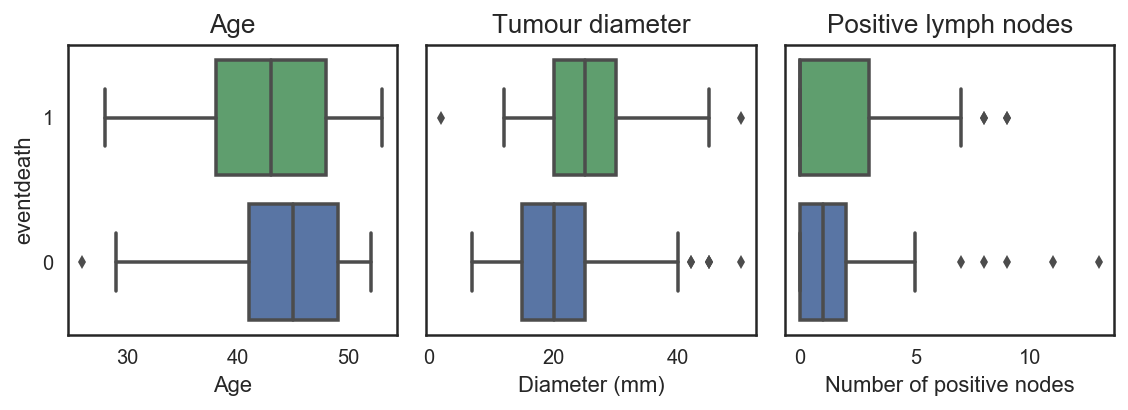

In [324]:
#visualise distribution of continuous clinical variables in both groups of patients
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(8,3), sharey=True)

pal = [sns.color_palette()[0], sns.color_palette()[1]]

sns.boxplot(x="age", y="eventdeath", orient="h", data=subset, ax=ax1, palette=pal)
sns.boxplot(x="diam", y="eventdeath", orient="h", data=subset, ax=ax2, palette=pal)
sns.boxplot(x="posnodes", y="eventdeath", orient="h", data=subset, ax=ax3, palette=pal)

ax1.set_title("Age", size=13)
ax1.invert_yaxis()
ax1.set_ylabel("eventdeath", size=11)
ax1.set_xlabel("Age")
ax2.set_title("Tumour diameter", size=13)
ax2.set_ylabel("")
ax2.set_xlabel("Diameter (mm)")
ax3.set_title("Positive lymph nodes", size=13)
ax3.set_ylabel("")
ax3.set_xlabel("Number of positive nodes")

plt.tight_layout()
plt.savefig("visuals/EDA_clinical_features.jpeg")
plt.show()

In [325]:
#determine the extent to which the predictor and dependent variables fluctuate together
from scipy.stats import pearsonr

clinical_corrs=pd.DataFrame(columns=["Variable", "Correlation coefficient", "P value"])
i=0
for var in ["age", "diam", "posnodes"]:
    corr, p = pearsonr(subset[var], subset["eventdeath"])
    clinical_corrs.loc[i, "Variable"] = var
    clinical_corrs.loc[i, "Correlation coefficient"] = corr
    clinical_corrs.loc[i, "P value"] = p
    i+=1

clinical_corrs

,Variable,Correlation coefficient,P value
0,age,-0.147643,0.0148035
1,diam,0.215344,0.000347234
2,posnodes,0.0917786,0.131077


#### Time-related features vs. event death

There were strong negative correlations between event death and a) the time between first treatment and follow-up and b) the time between first treatment and recurrence; the longer someone had survived or been disease free, the less likely they were to die. There is some argument to removing these variables for two reasons. Firstly because there is a lack of patients who – at the time of the most recent assessment – had survived breast cancer that had onset less than 5 years ago, causing any model to be heavily weighted to predict death for newly diagnosed patients. Secondly, the interval before recurrence would not be a relevant variable for these newly diagnosed patients with no prior history. These variables would therefore have to be removed and the model re-learned for use in a practical real-world scenario. 


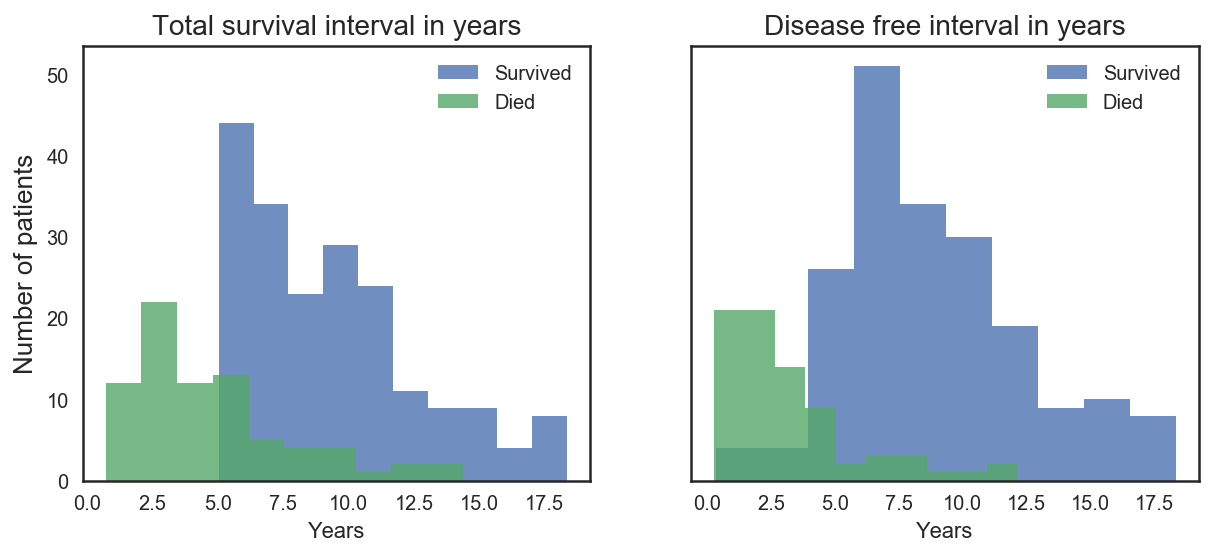

In [326]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,4), sharey=True)

died = subset[subset["eventdeath"]==1]
survived = subset[subset["eventdeath"]==0]

ax1.hist(survived.survival, alpha=0.8, color=sns.color_palette()[0], label="Survived")
ax1.hist(died.survival, alpha=0.8, color=sns.color_palette()[1], label="Died")
ax1.legend()

ax2.hist(survived.timerecurrence, alpha=0.8, color=sns.color_palette()[0], label="Survived")
ax2.hist(died.timerecurrence, alpha=0.8, color=sns.color_palette()[1], label="Died")
ax2.legend()

ax1.set_xlabel("Years")
ax1.set_ylabel("Number of patients", size=13)
ax1.set_title("Total survival interval in years", size=14)
ax2.set_xlabel("Years")
ax2.set_title("Disease free interval in years", size=14)
plt.savefig("visuals/EDA_clinical_time_features.jpeg")
plt.show()

In [327]:
#determine the extent to which these correlate together

time_corrs=pd.DataFrame(columns=["Variable", "Correlation coefficient", "P value"])
i=0
for var in ["survival", "timerecurrence"]:
    corr, p = pearsonr(subset[var], subset["eventdeath"])
    time_corrs.loc[i, "Variable"] = var
    time_corrs.loc[i, "Correlation coefficient"] = corr
    time_corrs.loc[i, "P value"] = p
    i+=1

time_corrs

,Variable,Correlation coefficient,P value
0,survival,-0.540482,4.94044e-22
1,timerecurrence,-0.608654,5.84719e-29


#### Categorical variables vs. event death

In general, less severe classes of angioinvasion and lymphocytic infiltration negatively correlated with event death whereas more severe classes positively correlated, but these relationships were weak and nearly always statistically insignificant. There was no correlation between each kind of treatment and outcome. The lack of strong correlations between clinical variables and the event of death are concurrent with the observation that breast cancer patients with the same stage of disease can have markedly different outcomes, highlighting the need to incorporate genetic or environmental variables for better prognosis.

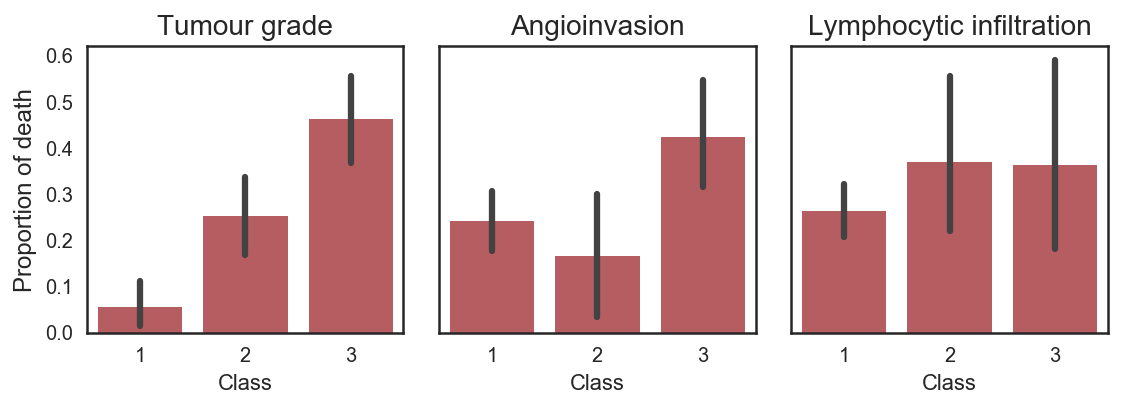

In [328]:
#visualise relationship for categorical clinical variables

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(8,3), sharey=True)

sns.barplot(x="grade", y="eventdeath", data=subset, ax=ax1, color=sns.color_palette()[2])
sns.barplot(x="angioinv", y="eventdeath", data=subset, ax=ax2, color=sns.color_palette()[2])
sns.barplot(x="lymphinfil", y="eventdeath", data=subset, ax=ax3, color=sns.color_palette()[2])

ax1.set_title("Tumour grade", size=14)
ax1.set_xlabel("Class")
ax1.set_ylabel("Proportion of death", size=12)
ax2.set_title("Angioinvasion", size=14)
ax2.set_ylabel("")
ax2.set_xlabel("Class")
ax3.set_title("Lymphocytic infiltration", size=14)
ax3.set_ylabel("")
ax3.set_xlabel("Class")
plt.tight_layout()
plt.savefig("visuals/EDA_clinical_categorical_features.jpeg")
plt.show()

#error bars indicate the standard error of the mean - the uncertainty in our observation -
#this is larger in samples where the variation is larger and/or the sample size is smaller.
#error bars overlapping with those for other classes means that the difference between
#the two groups is definitely not statistically significant at the p=0.05 level (non
#overlapping error bars have the potential to be statistical significant but are not
#proved by this by-eye method)

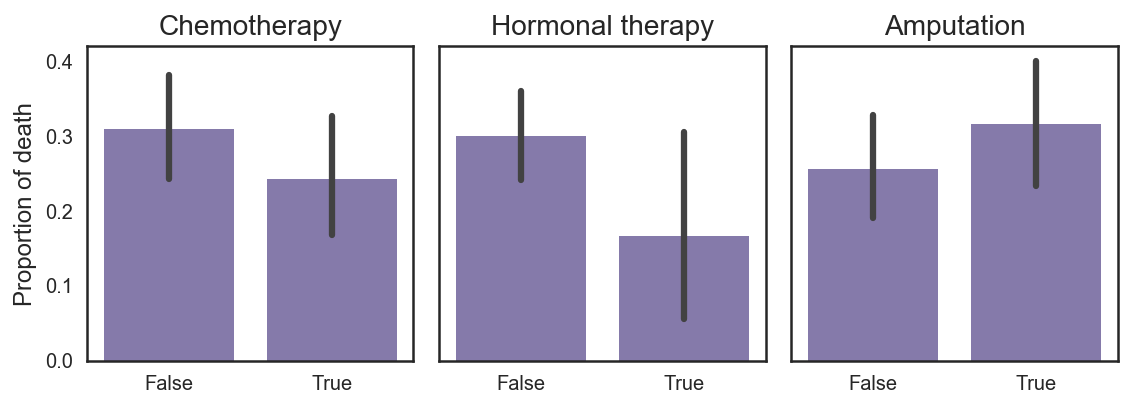

In [329]:
#visualise relationship for categorical treatment variables

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(8,3), sharey=True)

sns.barplot(x="chemo", y="eventdeath", data=subset, ax=ax1, color=sns.color_palette()[3])
sns.barplot(x="hormonal", y="eventdeath", data=subset, ax=ax2, color=sns.color_palette()[3])
sns.barplot(x="amputation", y="eventdeath", data=subset, ax=ax3, color=sns.color_palette()[3])

ax1.set_title("Chemotherapy", size=14)
ax1.set_ylabel("Proportion of death", size=12)
ax1.set_xlabel("")
ax2.set_title("Hormonal therapy", size=14)
ax2.set_xlabel("")
ax2.set_ylabel("")
ax3.set_title("Amputation", size=14)
ax3.set_xlabel("")
ax3.set_ylabel("")
plt.tight_layout()
plt.savefig("visuals/EDA_clinical_categorical_treatment_features.jpeg")
plt.show()

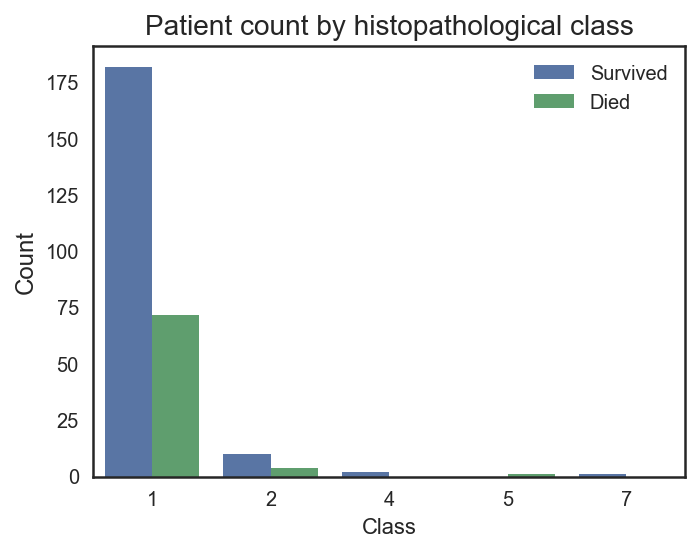

In [330]:
#classes of the last categorical variable "histtype" are majorly imbalanced 
#most observations belong to the first class which is similar to the baseline
#there is not enough variation within other classes for these to be informative
#therefore this variable will not be used for predictive purposes from herein onwards

fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(5,4))
sns.countplot(x="histtype", hue="eventdeath", ax=ax1, data=subset)
ax1.set_title("Patient count by histopathological class", size=14)
ax1.set_xlabel("Class")
ax1.set_ylabel("Count", size=12)
ax1.legend(("Survived", "Died"), loc="upper right")
plt.tight_layout()
plt.savefig("visuals/EDA_clinical_features_histtype.jpeg")
plt.show()

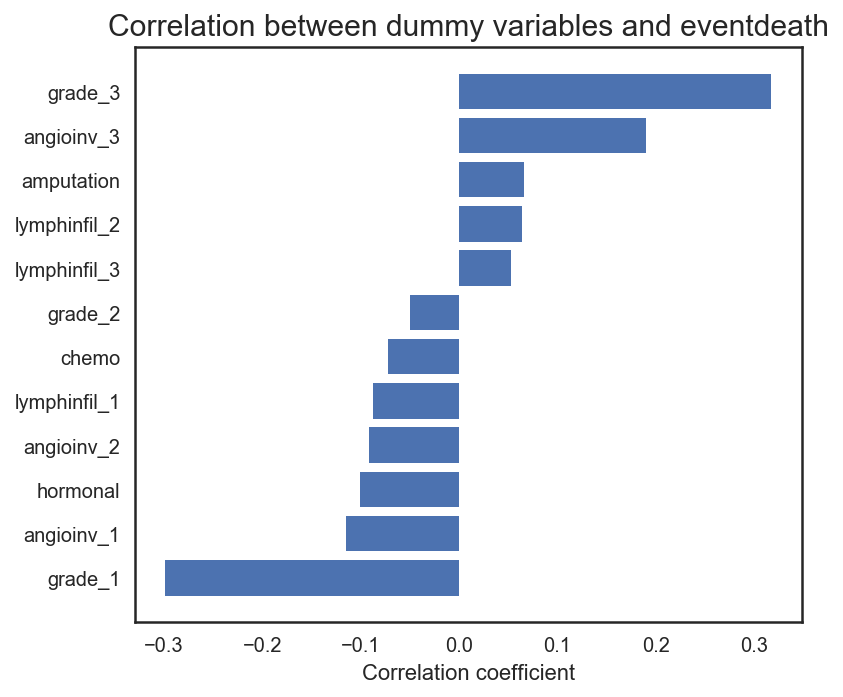

In [331]:
#dummy the categorical variables and determine the extent to which they correlate
#with the target variable
clinical_var = ["age", "diam", "posnodes", "survival", "timerecurrence", "grade", "angioinv", "lymphinfil", "chemo", "hormonal", "amputation"]
subset2 = df.loc[:,clinical_var]
dummied = pd.get_dummies(subset2, columns=["grade", "angioinv", "lymphinfil"])

#create a dataframe of correlations
dummied_corrs=pd.DataFrame(columns=["Variable", "Correlation coefficient", "P value"])
i=0
for var in dummied.loc[:,"chemo":].columns:
    corr, p = pearsonr(dummied[var], subset["eventdeath"])
    dummied_corrs.loc[i, "Variable"] = var
    dummied_corrs.loc[i, "Correlation coefficient"] = corr
    dummied_corrs.loc[i, "P value"] = p
    i+=1

#visualise
fig, ax = plt.subplots(figsize=(6,5))
dummied_corrs = dummied_corrs.sort_values("Correlation coefficient", ascending=True)
labels = dummied_corrs["Variable"]
y_pos = np.arange(len(labels))
ax.barh(y_pos, dummied_corrs["Correlation coefficient"])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation between dummy variables and eventdeath", size=15)
plt.tight_layout()
plt.savefig("visuals/EDA_dummy_clinical.jpeg")
plt.show()

<a name="section3.2"></a>
### 3.2 Relationship between clinical variables and each other

There were a number of interesting relationships between clinical variables; when comparing the three options of treatment, chemotherapy correlated strongly with the number of positive nodes, amputation correlated with tumour diameter and hormonal therapy correlated with age. It is logical to suggest that this might reflect the appropriateness of each treatment ie. doctors choose to administer chemotherapy when the cancer is widespread but choose to amputate the breast when a tumour is large. 

There were negative correlations between classes originating from the same dummy variables; this was expected because observations belong to either one class or the other. There was a relationship between the classes of lymphocytic infiltration and tumour grade, whereby severe classes correlated with each other and weak classes correlated with each other, but severe classes negatively correlated with weak classes eg. lymphocytic infiltration class 1 (-/-) against tumour grade 3. This is logical because the amount of lymphocytic infiltration is a contributing factor to the severity of a cancer during the grading process, so higher levels of lymphocytic infiltration are more likely to be seen in grade 3 cancers.


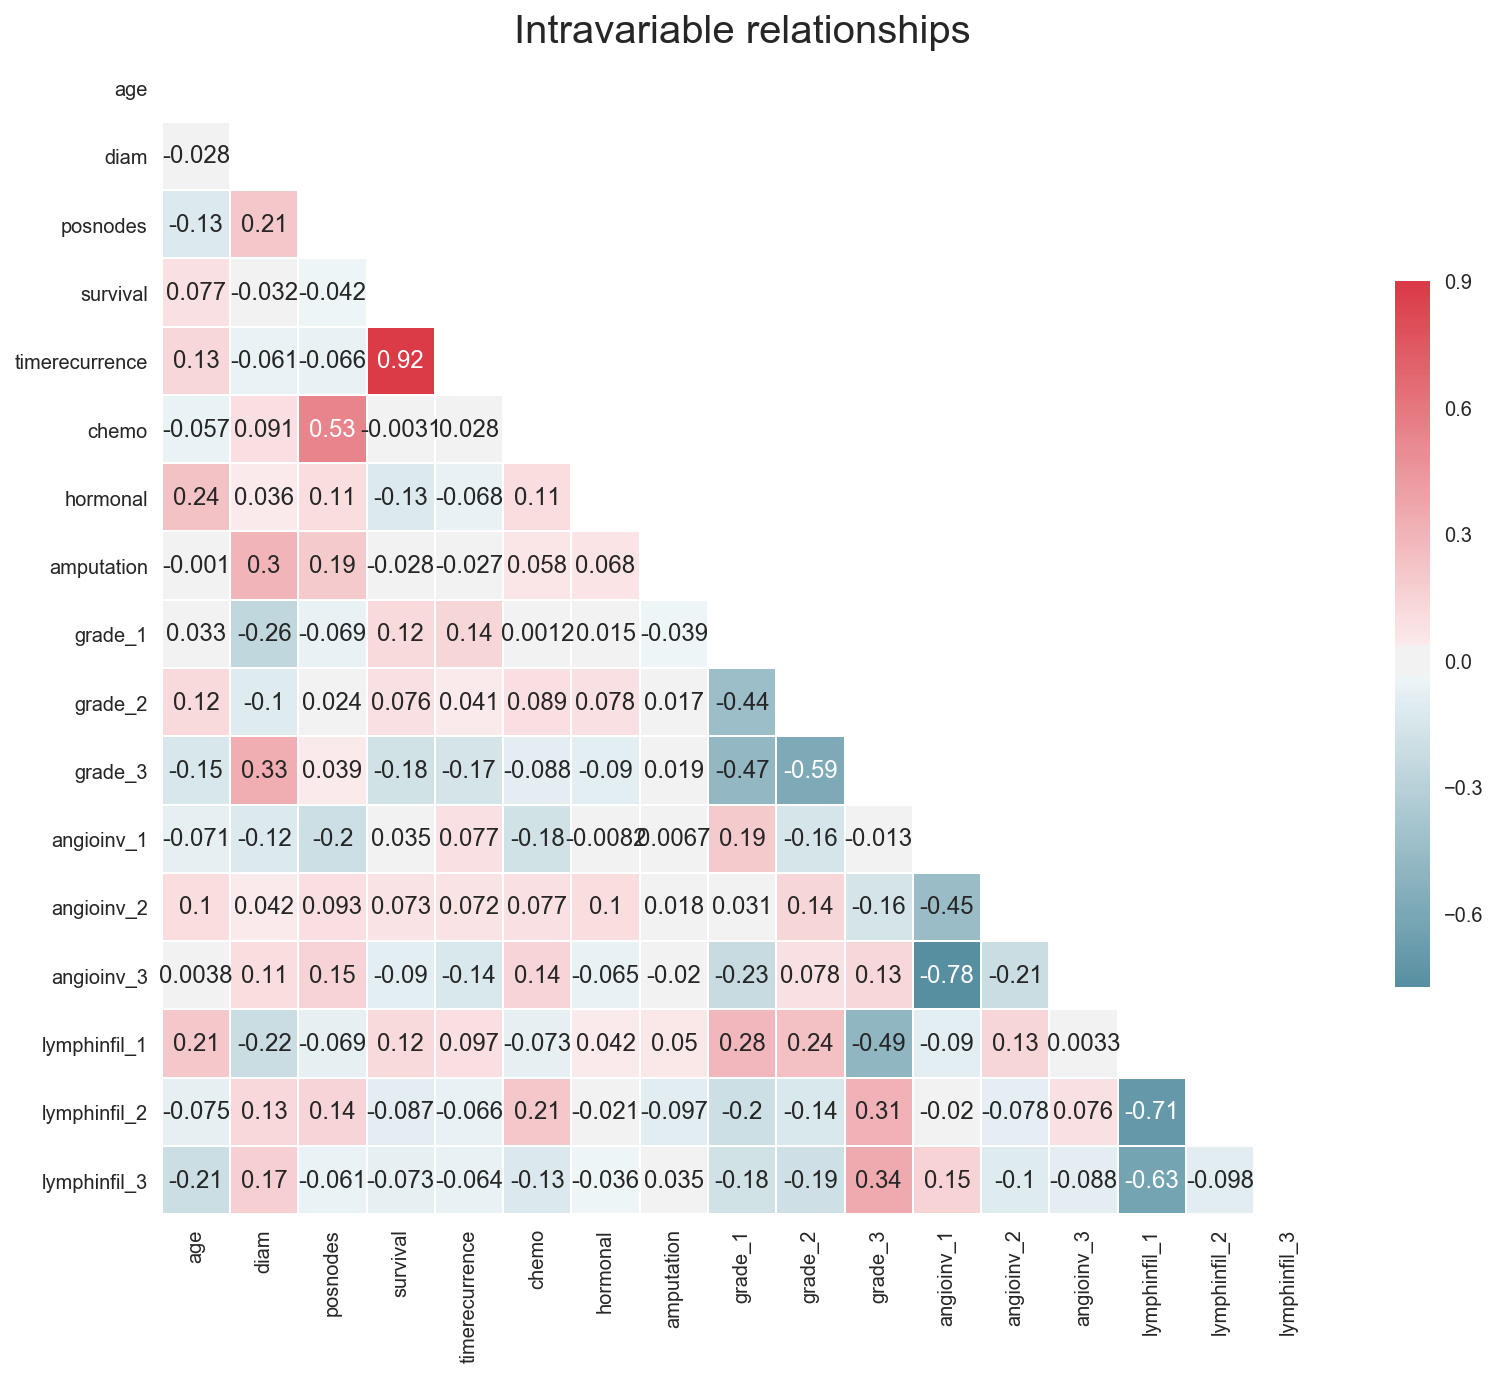

In [332]:
corr=dummied.corr(method="pearson")
sns.set(style="white")
f, ax = plt.subplots(figsize=(13,13))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap = True)
ax = sns.heatmap(corr, cmap=cmap, mask=mask, annot=True, vmax=.9, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})
ax.set_title("Intravariable relationships", size=20)
plt.savefig("visuals/EDA_heatmap.jpeg")
plt.show()

<a name="section3.3"></a>
### 3.3 Breakdown of treaments

Two-thirds of the patients had received a form of treatment: chemotherapy, hormonal therapy and/or an amputation. Of these treated patients, the proportion of death was highest (40%) in the subgroup that had only received an amputation. This was statistically significant when compared to the baseline frequency of 28% at the p=0.05 level. Given that amputation is a common solution for early-stage cancer, this might represent patients who could have additionally benefitted from more rigorous treatment like chemotherapy or hormonal therapy.

In [333]:
#statistics for the no treatment group and comparison with the baseline
no_treatment = subset[(subset["chemo"]==False) & (subset["amputation"]==False) & (subset["hormonal"]==False)]
print("Number of patients who had no treatment: " + str(np.shape(no_treatment)[0]))
print("Proportion of death in this group: " + ("%.3f" %np.mean(no_treatment["eventdeath"])))
print("Baseline comparison:")
print(df["eventdeath"].value_counts()/df["eventdeath"].count())

Number of patients who had no treatment: 87
Proportion of death in this group: 0.241
Baseline comparison:
0    0.716912
1    0.283088
Name: eventdeath, dtype: float64


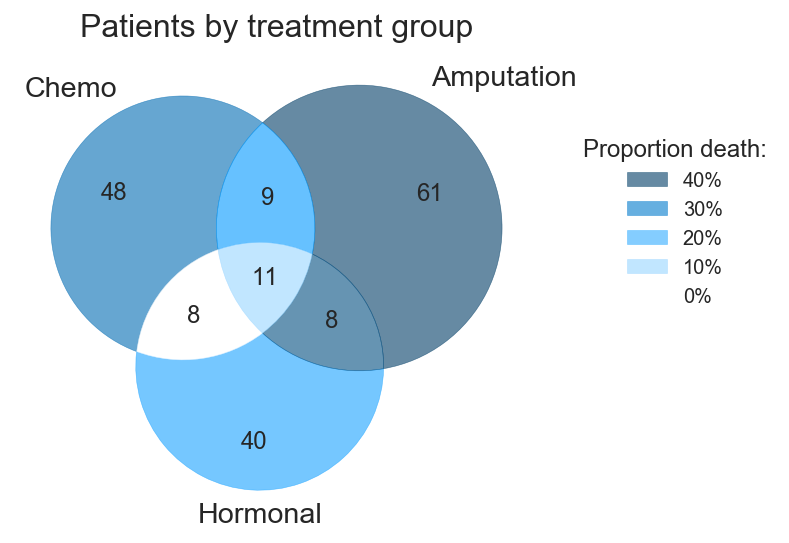

In [339]:
#visualise the treatments and proportion death for other groups using venn diagram
from matplotlib_venn import venn3
import matplotlib.patches as mpatches

#first create subsets for different combinations of treatments
chemo = subset[(subset["chemo"]==True) & (subset["amputation"]==False) & (subset["hormonal"]==False)]
amp = subset[(subset["chemo"]==False) & (subset["amputation"]==True) & (subset["hormonal"]==False)]
hormonal = subset[(subset["chemo"]==False) & (subset["amputation"]==False) & (subset["hormonal"]==True)]
chemo_amp = subset[(subset["chemo"]==True) & (subset["amputation"]==True) & (subset["hormonal"]==False)]
amp_hormonal = subset[(subset["chemo"]==False) & (subset["amputation"]==True) & (subset["hormonal"]==True)]
hormonal_chemo = subset[(subset["chemo"]==True) & (subset["amputation"]==False) & (subset["hormonal"]==True)]
all_3 = subset[(subset["chemo"]==True) & (subset["amputation"]==True) & (subset["hormonal"]==True)]

#calculate number of people for each combination and proportion death
df_subsets = [chemo, amp, hormonal, chemo_amp, amp_hormonal, hormonal_chemo, all_3]
sizes=[]
proportiondeath=[]
for dataframe in df_subsets:
    sizes.append(np.shape(dataframe)[0])
    proportiondeath.append(np.mean(dataframe["eventdeath"]))

#set size of circles relative to size of each subset (where possible)
#set gradient of blue according to proportion of death in subset calculated above
fig, ax = plt.subplots(figsize=(4,4))
c = venn3(subsets=sizes, set_labels=("Chemo", "Amputation", "Hormonal"), ax=ax)
c.get_patch_by_id('100').set_color("#006bb3")
c.get_patch_by_id('010').set_color("#003d66")
c.get_patch_by_id('001').set_color("#1aa3ff")
c.get_patch_by_id('110').set_color("#0099ff")
c.get_patch_by_id('011').set_color("#004d80")
c.get_patch_by_id('101').set_color("#ffffff")
c.get_patch_by_id('111').set_color("#99d6ff")
for patchid in ["100", "010", "001", "110", "011", "101", "111"]:
    c.get_patch_by_id(patchid).set_alpha(0.6)

patch_40 = mpatches.Patch(color="#003d66", alpha=0.6, label='40%')
patch_30 = mpatches.Patch(color="#007acc", alpha=0.6, label='30%')
patch_20 = mpatches.Patch(color="#33adff", alpha=0.6, label='20%')
patch_10 = mpatches.Patch(color="#99d6ff", alpha=0.6, label='10%')
patch_0 = mpatches.Patch(color="#ffffff", alpha=0.6, label='0%')

lgd = ax.legend(handles=[patch_40, patch_30, patch_20, patch_10, patch_0], title="Proportion death:", bbox_to_anchor=(1.05,0.85))
ax.set_title("Patients by treatment group", size=16)
plt.tight_layout()
plt.savefig("visuals/venn.jpeg", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

**How likely was seeing a higher proportion of 40% death in the subgroup who only had an amputation compared to the baseline of 28%?**

To determine this a chi squared goodness of fit test was chosen because the target variable eventdeath is categorical (0 or 1) and this test determines if the two sets of frequencies for observed and expected data are equal, by using chi squared as a measure of variance.

Null hypothesis = the observed and expected set of frequencies are equal (ie. survival rate in patients who had an amputation is no different to that from all patients).

| | 0| 1 | Total |
| :-------------: |:-------------:| :-------------:|:--------:|
|Observed (O) | 36 | 25 | 61
| Expected (E) | 43.73 | 17.26 | 61
| Residuals (O-E) | -7.73 | 7.74 | N/A
| (O-E)^2/E | 1.37 | 3.47 | 4.84 |

E was caluclated using the expected (baseline) percentages for a group of 61 observations, then the residuals were calculated, squared and divided by the expected frequencies. The sum of these results generates a chi-squared value of 4.84 (in "total" column).

This test statistic of 4.84 is significant at level p < 0.05 and 1 degree of freedom (p = 0.02 generated from a chi-squared test calculator).The null hypothesis is rejected and we can conclude that the higher proportion of death in the amputation-treated group is significant.

In [244]:
#confirm correct calculation using scipy
from scipy.stats import chisquare

stat, p = chisquare([36,25], [43.73, 17.26])
print("Chi squared statistic: " + "%.3f" %stat)
print("P value: " + "%.3f" %p)

Chi squared statistic: 4.837
P value: 0.028


In [245]:
#check if any other groups are statistically significant
df_subsets = [no_treatment, chemo, amp, hormonal, chemo_amp, amp_hormonal, hormonal_chemo]

for dataframe in df_subsets:
    try:
        zeros, ones = dataframe["eventdeath"].value_counts()
    except: #for the group where all patients survived
        ones = 0
        zeros = dataframe["eventdeath"].value_counts()[0]
    total = zeros+ones
    expected_zeros = total*0.7169
    expected_ones = total*0.2830
    chisq, p = chisquare([zeros, ones], [expected_zeros, expected_ones])
    if p < 0.05:
        print("Found significant statistic: " + "%.3f" %chisq + " with p value: " + "%.3f" %p)

#this is the same group as before (amputation); no other groups are
#statistically significant at the p=0.05 level

Found significant statistic: 4.834 with p value: 0.028


<a name="section3.4"></a>
### 3.4 Relationship between gene expression and prognosis

The shape, centre and spread of expression data varied across different genes. This complexity was encouraging as it provides depth for explaining the underlying predictive pattern. The least varied gene in the dataset had a standard deviation of 0.13; this represents the cutoff for genes to be considered in the dataset (the top ~1550 varying genes out of thousands). There was also a range in the amount of linear correlation between gene expression and event death. Around half of the genes correlated weakly (pearson coefficient between -0.1 and 0.1) and are likely to be uninformative in linear methods such as lasso logistic regression, but may be informative in a decision tree if the underlying process is non-linear.

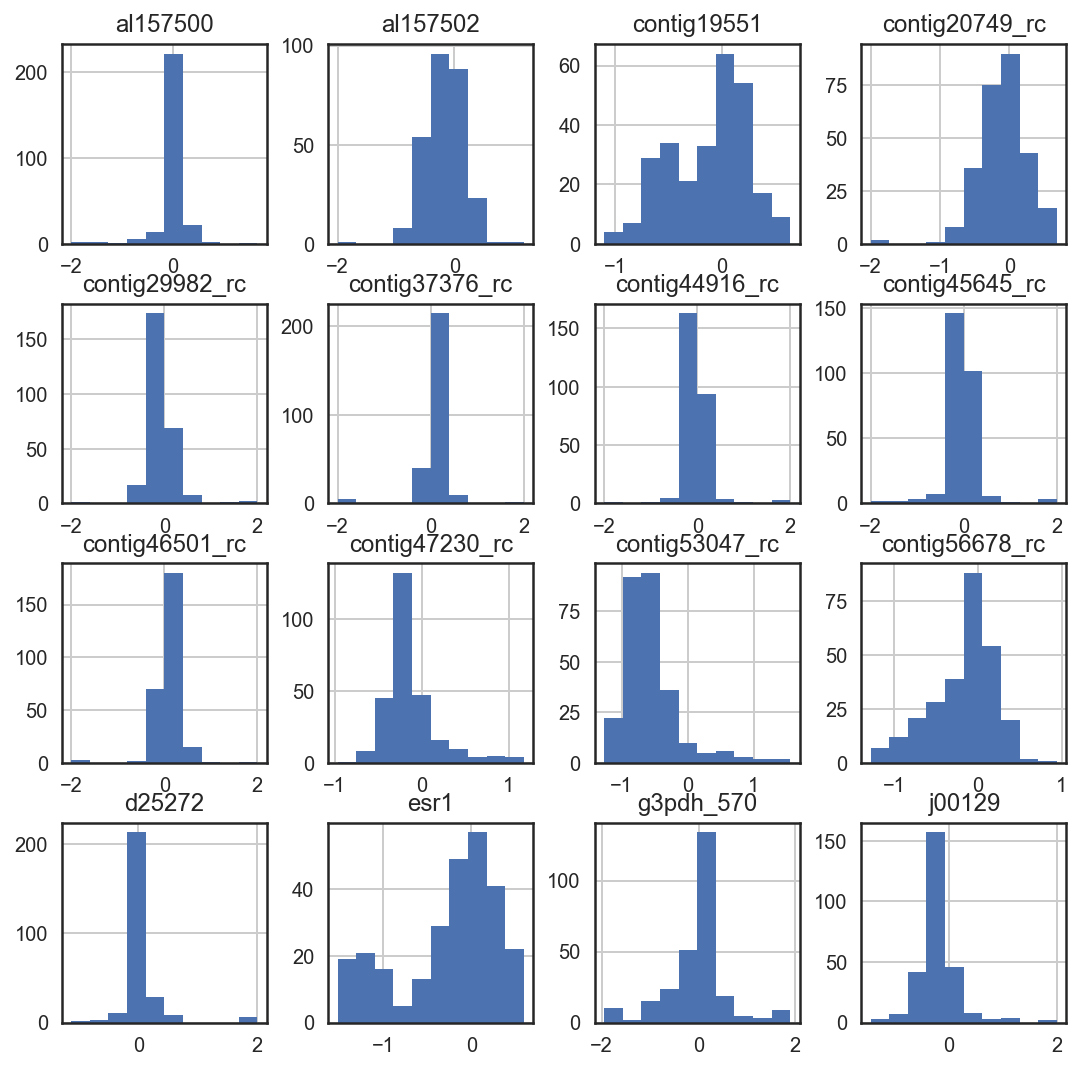

In [256]:
#what do the gene names and distributions look like?
genes = df.loc[:,"esr1":]
genes.iloc[:,:16].hist(figsize=(9,9))
plt.savefig("visuals/EDA_gene_distributions.jpeg")
plt.show()

Minimum standard deviation: 0.130


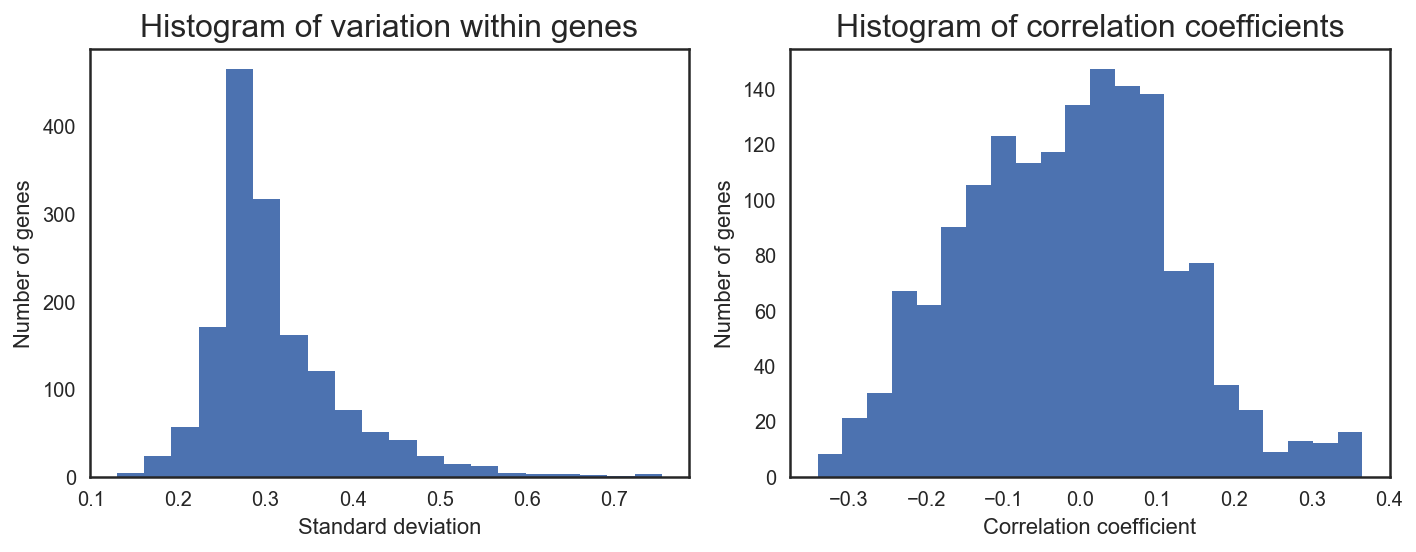

In [263]:
#how varied are genes and how well do they correlate with eventdeath?
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,4))

#plot histogram of variation using standard deviation as a measure
stds=[]
for col in genes.columns:
    std = np.std(genes[col])
    stds.append(std)
ax1.hist(stds, bins=20)
ax1.set_xlabel("Standard deviation")
ax1.set_ylabel("Number of genes")
ax1.set_title("Histogram of variation within genes", size=16)
#determine the cut-off for a gene to be considered varied enough to be in dataset
#as this dataset includes the top ~1550 most varied genes
print("Minimum standard deviation: " + "%.3f" %np.min(stds))

#plot histogram of correlation coefficients using pearson statistic as a measure
from scipy.stats import pearsonr
from __future__ import division
corrs=[]
for col in genes.columns:
    corr, p = pearsonr(genes[col], df["eventdeath"])
    corrs.append(corr)
ax2.hist(corrs, bins="auto")
ax2.set_xlabel("Correlation coefficient")
ax2.set_ylabel("Number of genes")
ax2.set_title("Histogram of correlation coefficients", size=16)
plt.tight_layout()
plt.savefig("visuals/EDA_gene_distributions.jpeg")
plt.show()

<a name="section4"></a>
## 4: Modelling

<a name="section4.1"></a>
### 4.1 Using clinical variables only

Initially, the 17 clinical features were used on their own to learn a model for predicting event death. This represents the prediction that is made without genetic information; an automated version of a clinician’s prognosis. An accuracy of 92% was achieved using a decision tree, which was much higher than the baseline of 71.7%. However this accuracy dropped to 76% when the time-related features were removed, which represents the accuracy of diagnosis for first-time patients.

In [275]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import pickle

#assign X and y
y = subset["eventdeath"]
X = dummied.copy() #use dataframe of dummied predictive clinical features 
X = StandardScaler().fit_transform(X)

#and an X without time related features as these have no predictive power for new patients
X_predictive = dummied.copy()
del X_predictive["survival"]
del X_predictive["timerecurrence"]
predictive_df = X_predictive.copy()
X_predictive = StandardScaler().fit_transform(X_predictive)

#baseline accuracy is 72%
print(subset["eventdeath"].value_counts()/subset["eventdeath"].count())

0    0.716912
1    0.283088
Name: eventdeath, dtype: float64


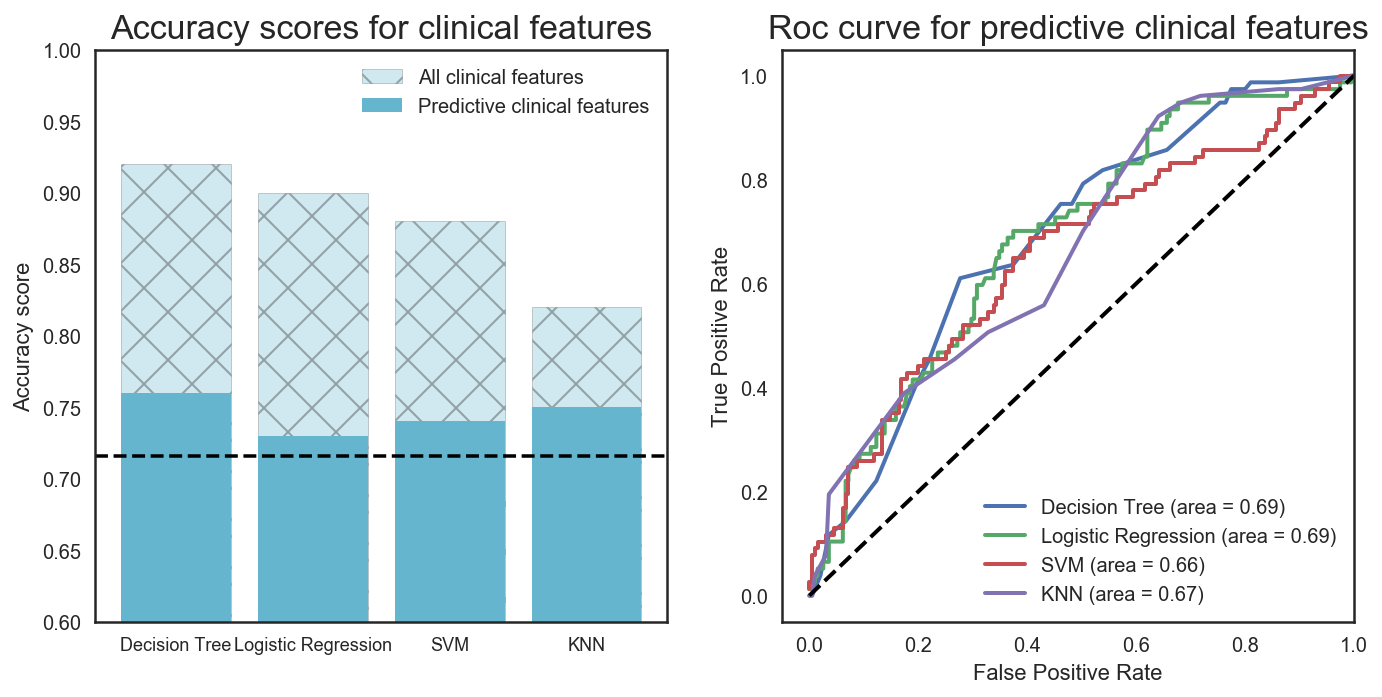

In [294]:
#create visual summary of results in this section
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,5))

#bar chart of accuracy scores
inds = range(1,5)
labels = ["Decision Tree", "Logistic Regression", "SVM", "KNN"]
scores_all = [0.92, 0.90, 0.88, 0.82]
scores_predictive = [0.76, 0.73, 0.74, 0.75]
ax1.bar(inds, scores_all, color=sns.color_palette()[5], alpha=0.3, hatch="x", edgecolor="none",label="All clinical features")
ax1.bar(inds, scores_predictive, color=sns.color_palette()[5], label="Predictive clinical features")
ax1.set_ylim(0.6, 1)
ax1.set_ylabel("Accuracy score")
ax1.axhline(0.716, color="black", linestyle="--")
ax1.set_title("Accuracy scores for clinical features", fontsize=17)
ax1.set_xticks(range(1,5))
ax1.set_xticklabels(labels, size=9)
ax1.legend()

#roc curve for best model of each kind (saved as pickle files later in notebook) 
clinical_tree = pickle.load(open("clinical_models/tree.pkl", "r"))
pp_tree = cross_val_predict(clinical_tree, X_predictive, y, cv=4, method="predict_proba")
clinical_logreg = pickle.load(open("clinical_models/logreg.pkl", "r"))
pp_logreg = cross_val_predict(clinical_logreg, X_predictive, y, cv=4, method="predict_proba")
clinical_SVM = pickle.load(open("clinical_models/SVM.pkl", "r"))
pp_SVM = cross_val_predict(clinical_SVM, X_predictive, y, cv=4, method="predict_proba")
clinical_KNN = pickle.load(open("clinical_models/KNN.pkl", "r"))
pp_KNN = cross_val_predict(clinical_KNN, X_predictive, y, cv=4, method="predict_proba")

labels = ["Decision Tree", "Logistic Regression", "SVM", "KNN"]
for label, pp in zip(labels, [pp_tree, pp_logreg, pp_SVM, pp_KNN]):
    fpr, tpr, threshold = roc_curve(y, pp[:,1])
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label=label+' (area = %0.2f)' % roc_auc, linewidth=2)
ax2.plot([0, 1], [0, 1], 'k--', linewidth=2)
ax2.set_xlim([-0.05, 1.0])
ax2.set_ylim([-0.05, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.legend(loc="lower right")
ax2.set_title("Roc curve for predictive clinical features", fontsize=17)

plt.tight_layout()
plt.savefig("visuals/models_clinical.jpeg")
plt.show()

#### Decision Tree

In [121]:
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, len(dummied.columns)),
    "max_features": [None, "sqrt", "log2", 2,3,4,5],
    "min_samples_split": [2,3,4,5,10,15,20,25,30,40,50],
    "min_samples_leaf": [1,2,3]
}
#all features
tree = DecisionTreeClassifier()
gridsearch = GridSearchCV(tree, params, n_jobs=-1, cv=4)
gridsearch.fit(X, y)

#predictive features
tree = DecisionTreeClassifier()
pred_gridsearch = GridSearchCV(tree, params, n_jobs=-1, cv=4)
pred_gridsearch.fit(X_predictive, y)
pickle.dump(pred_gridsearch.best_estimator_, open("clinical_models/tree.pkl", 'wb'))

print("baseline accuracy: " + str(0.717))
print("decision tree accuracy: " + str(gridsearch.best_score_))
print("decision tree accuracy using only predictive features: " + str(pred_gridsearch.best_score_))
print("best params with predictive features: " + str(pred_gridsearch.best_params_))

best_model = pred_gridsearch.best_estimator_
importances = pd.DataFrame({"feature": predictive_df.columns, "importance": best_model.feature_importances_})
display(importances[importances["importance"]!=0].sort_values("importance", ascending=False).head())
print("number of important (non zero) features: " + str(importances[importances["importance"]!=0].shape[0]))

baseline accuracy: 0.717
decision tree accuracy: 0.911764705882
decision tree accuracy using only predictive features: 0.764705882353
best params with predictive features: {'max_features': 3, 'min_samples_split': 5, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 3}


,feature,importance
1,diam,0.360484
8,grade_3,0.265717
2,posnodes,0.216113
6,grade_1,0.157686


number of important (non zero) features: 4


#### Logistic Regression

In [122]:
params = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-2,4,100)
}
#all features
logreg = LogisticRegression()
gridsearch = GridSearchCV(logreg, params, n_jobs=-1, cv=4)
gridsearch.fit(X, y)

#predictive features
logreg = LogisticRegression()
pred_gridsearch = GridSearchCV(logreg, params, n_jobs=-1, cv=4)
pred_gridsearch.fit(X_predictive, y)
pickle.dump(pred_gridsearch.best_estimator_, open("clinical_models/logreg.pkl", 'wb'))

print("baseline accuracy: " + str(0.717))
print("logreg accuracy: " + str(gridsearch.best_score_))
print("logreg accuracy using only predictive features: " + str(pred_gridsearch.best_score_))
print("logreg best params with predictive features: " + str(gridsearch.best_params_))

best_model = pred_gridsearch.best_estimator_
coefs = pd.DataFrame({"variable": predictive_df.columns, "coef": best_model.coef_[0]})
display(coefs[coefs["coef"]!=0].sort_values("coef", ascending=False))
print("number of non-zero coefficients: " + str(coefs[coefs["coef"]!=0].shape[0]))

baseline accuracy: 0.717
logreg accuracy: 0.900735294118
logreg accuracy using only predictive features: 0.731617647059
logreg best params with predictive features: {'penalty': 'l1', 'C': 0.093260334688321997}


,coef,variable
8,0.301574,grade_3
11,0.162624,angioinv_3
1,0.140959,diam
4,-0.022423,hormonal
3,-0.039116,chemo
0,-0.131716,age
6,-0.398291,grade_1


number of non-zero coefficients: 7


#### SVM

In [135]:
from sklearn import svm

params = {
    "C": np.logspace(-2,2,20),
    "kernel": ["linear", "poly", "rbf"],
    "gamma": np.logspace(-5,2,20),
    "degree": [3]
}
#all features
clf = svm.SVC(probability=True)
gridsearch = GridSearchCV(clf, params, n_jobs=-1, cv=4)
gridsearch.fit(X, y)

#predictive features
clf = svm.SVC(probability=True)
pred_gridsearch = GridSearchCV(clf, params, n_jobs=-1, cv=4)
pred_gridsearch.fit(X_predictive, y)
pickle.dump(pred_gridsearch.best_estimator_, open("clinical_models/SVM.pkl", 'wb'))

print("baseline accuracy: " + str(0.717))
print("SVM accuracy: " + str(gridsearch.best_score_))
print("SVM accuracy using only predictive features: " + str(pred_gridsearch.best_score_))
print("best params using predictive features: " + str(pred_gridsearch.best_params_))

baseline accuracy: 0.717
SVM accuracy: 0.882352941176
SVM accuracy using only predictive features: 0.742647058824
best params using predictive features: {'kernel': 'poly', 'C': 8.8586679041008232, 'gamma': 0.02069138081114788, 'degree': 3}


#### KNN

In [125]:
from sklearn.neighbors import KNeighborsClassifier

params = {
    "n_neighbors" : [1,5,10,15,20,25,30,35,40],
    "weights" : ["uniform" , "distance"]
}
#all features
knn = KNeighborsClassifier()
gridsearch = GridSearchCV(knn, params, n_jobs=-1, cv=4)
gridsearch.fit(X, y)

#predictive features
knn = KNeighborsClassifier()
pred_gridsearch = GridSearchCV(knn, params, n_jobs=-1, cv=4)
pred_gridsearch.fit(X_predictive, y)
pickle.dump(pred_gridsearch.best_estimator_, open("clinical_models/KNN.pkl", 'wb'))

print("baseline accuracy: " + str(0.717))
print("KNN accuracy: " + str(gridsearch.best_score_))
print("KNN accuracy using only predictive features: " + str(pred_gridsearch.best_score_))
print("best params using predictive features: " + str(pred_gridsearch.best_params_))

baseline accuracy: 0.717
KNN accuracy: 0.823529411765
KNN accuracy using only predictive features: 0.746323529412
best params using predictive features: {'n_neighbors': 25, 'weights': 'uniform'}


<a name="section4.2"></a>
### 4.2 Using gene expression only

Modelling using gene expression variables produced accuracy scores that matched or exceeded those obtained using the predictive clinical variables, in all cases but KNN. This was encouraging as it signifies that gene expression adds as much value in predictive power as the clinical features we already use for diagnosis. Most notably, an accuracy score of 85% was achieved through generating feature interactions for modelling genes with logisitc regression, which was much higher than the best model (76%) when using predictive features. This score could additionally be improved by including all genes in the dataset instead of just the top most varying genes, and by generating interactions between triplets of genes instead of just pairs of genes. However with the small dataset of 272 patients, both these approaches could lead to overfitting very easily.

In [277]:
#assign X and y
y = subset["eventdeath"]
X = genes.copy() #use dataframe of genes subset 
X = StandardScaler().fit_transform(X)

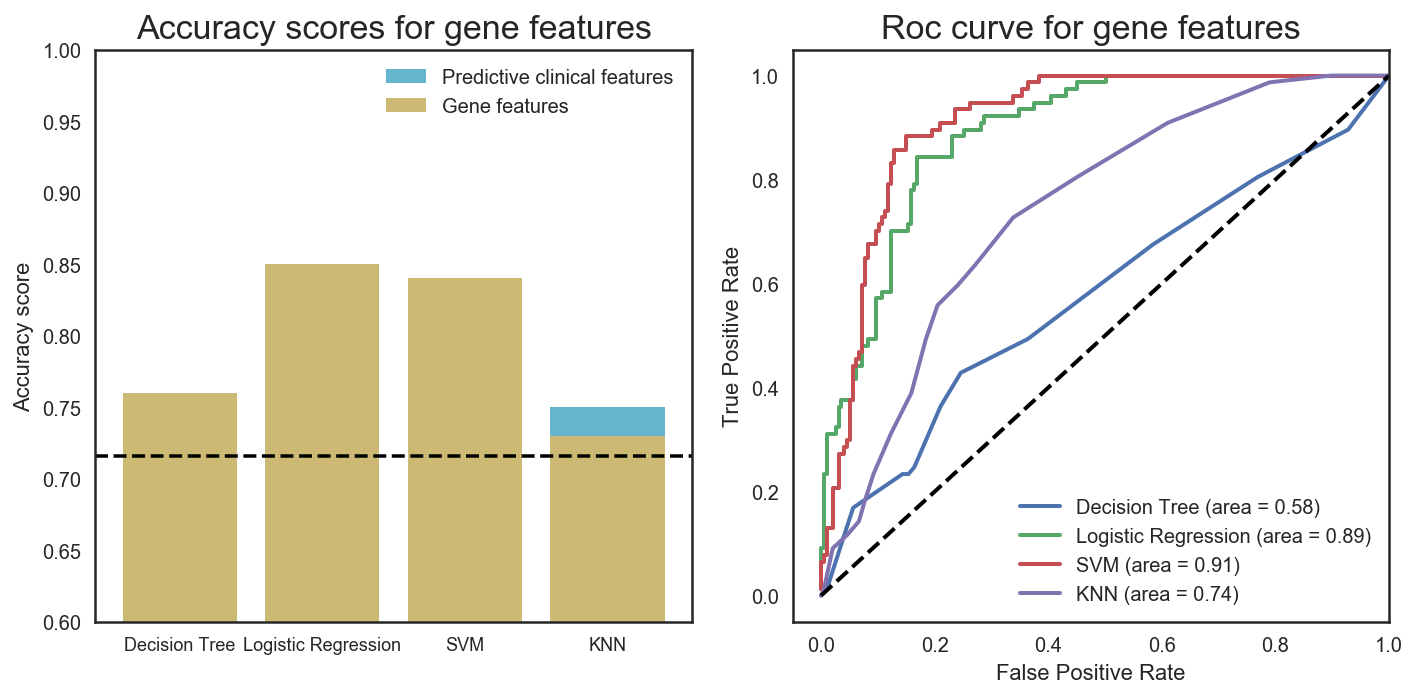

In [295]:
#create visual summary of results in section
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,5))

#bar chart of accuracy scores
inds = range(1,5)
labels = ["Decision Tree", "Logistic Regression", "SVM", "KNN"]
scores_all = [0.92, 0.90, 0.88, 0.82]
scores_predictive = [0.76, 0.73, 0.74, 0.75]
scores_genes = [0.76, 0.85, 0.84, 0.73]
ax1.bar(inds, scores_predictive, color=sns.color_palette()[5], label="Predictive clinical features")
ax1.bar(inds, scores_genes, color=sns.color_palette()[4], label="Gene features")
ax1.set_ylim(0.6, 1)
ax1.set_ylabel("Accuracy score")
ax1.axhline(0.716, color="black", linestyle="--")
ax1.set_title("Accuracy scores for gene features", fontsize=17)
ax1.set_xticks(range(1,5))
ax1.set_xticklabels(labels, size=9)
ax1.legend()

#roc curve for fpr vs tpr using saved models from below
gene_tree = pickle.load(open("gene_models/tree.pkl", "r"))
pp_tree = cross_val_predict(gene_tree, X, y, cv=4, method="predict_proba")
gene_logreg = pickle.load(open("gene_models/logreg.pkl", "r"))
pp_logreg = cross_val_predict(gene_logreg, higher_X, y, cv=4, method="predict_proba")
gene_SVM = pickle.load(open("gene_models/SVM_int.pkl", "r"))
pp_SVM = cross_val_predict(gene_SVM, higher_X, y, cv=4, method="predict_proba")
gene_KNN = pickle.load(open("gene_models/KNN.pkl", "r"))
pp_KNN = cross_val_predict(gene_KNN, X, y, cv=4, method="predict_proba")

labels = ["Decision Tree", "Logistic Regression", "SVM", "KNN"]
for label, pp in zip(labels, [pp_tree, pp_logreg, pp_SVM, pp_KNN]):
    fpr, tpr, threshold = roc_curve(y, pp[:,1])
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label=label+' (area = %0.2f)' % roc_auc, linewidth=2)
ax2.plot([0, 1], [0, 1], 'k--', linewidth=2)
ax2.set_xlim([-0.05, 1.0])
ax2.set_ylim([-0.05, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.legend(loc="lower right")
ax2.set_title("Roc curve for gene features", fontsize=17)

plt.tight_layout()
plt.savefig("visuals/models_genes.jpeg")
plt.show()

#### Logistic Regression

In [40]:
params = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-2,4,100)
}
logreg = LogisticRegression()
gridsearch = GridSearchCV(logreg, params, n_jobs=-1, cv=4)
gridsearch.fit(X, y)

print("baseline accuracy: " + str(0.717))
print("gridsearch logreg accuracy: " + str(gridsearch.best_score_))
print("gridsearch logreg best params: " + str(gridsearch.best_params_))

best_model = gridsearch.best_estimator_
coefs = pd.DataFrame({"variable": genes.columns, "coef": best_model.coef_[0]})
print("variables that contribute positively to event death the most: ")
display(coefs.sort_values("coef", ascending=False).head())
print("variables that contribute negatively to event death the most: ")
display(coefs.sort_values("coef", ascending=True).head())
print("number of non-zero coefficients: " + str(coefs[coefs["coef"]!=0].shape[0]))

baseline accuracy: 0.717
gridsearch logreg accuracy: 0.75
gridsearch logreg best params: {'penalty': 'l1', 'C': 0.10722672220103231}
variables that contribute positively to event death the most: 


,coef,variable
1090,0.404441,nm_016359
963,0.222494,contig23211_rc
601,0.177408,al117638
1345,0.144106,nm_001109
677,0.129692,nm_006096


variables that contribute negatively to event death the most: 


,coef,variable
330,-0.292620,nm_003430
840,-0.218887,nm_006398
264,-0.196637,nm_012067
843,-0.144540,nm_004950
1319,-0.113344,al049963


number of non-zero coefficients: 48


Number of generated feature interactions with correlation as strong as 0.2: 28062


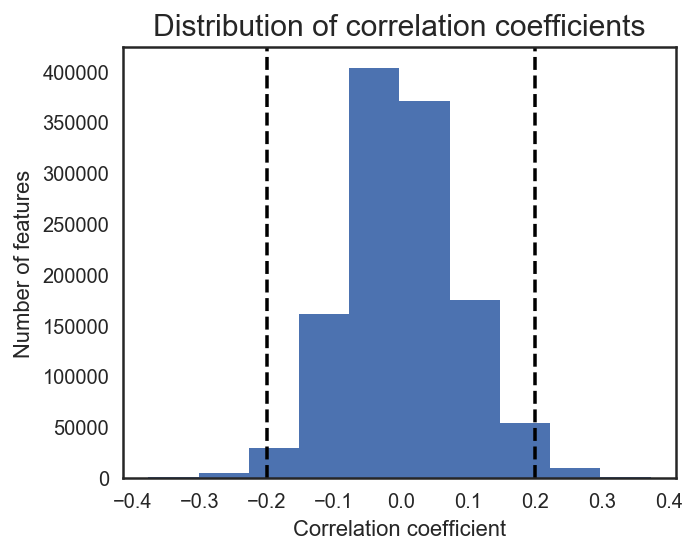

In [315]:
#generate feature interactions and assess correlation with target variable
from itertools import combinations

corrs=[]
for combination in combinations(genes.columns,2):
    first, second = combination[0], combination[1]
    new_array = genes[first]*genes[second]
    corr, p = pearsonr(new_array, y)
    corrs.append(corr)

high_corr = [corr for corr in corrs if corr > 0.2 or corr < -0.2]
print("Number of generated feature interactions with correlation as strong as 0.2: " + str(len(high_corr)))
fig, ax = plt.subplots(figsize=(5,4))
fig = plt.hist(corrs)
ax.axvline(0.2, color="black", linestyle="--")
ax.axvline(-0.2, color="black", linestyle="--")
plt.ylabel("Number of features")
plt.xlabel("Correlation coefficient")
plt.title("Distribution of correlation coefficients", size=15)
plt.tight_layout()
plt.savefig("visuals/modelling_feature_interactions_corr.jpeg")
plt.show()

In [34]:
#determine best threshold to use for feature interactions to be considered in dataset
from itertools import combinations

#generate 7 boundaries to test and dataframes for each
boundaries = [0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35]
thresh_1=genes.copy()
thresh_2=genes.copy()
thresh_3=genes.copy()
thresh_4=genes.copy()
thresh_5=genes.copy()
thresh_6=genes.copy()
thresh_7=genes.copy()
genes_dfs = [thresh_1, thresh_2, thresh_3, thresh_4, thresh_5, thresh_6, thresh_7]

#add feature interactions above the boundary to each
for combination in combinations(genes.columns,2):
    first, second = combination[0], combination[1]
    new_array = genes[first]*genes[second]
    corr, p = pearsonr(new_array, y)
    for bound, df in zip(boundaries, genes_dfs):
        upper = bound
        lower = -bound
        if corr < lower or corr > upper:
            df[combination] = new_array

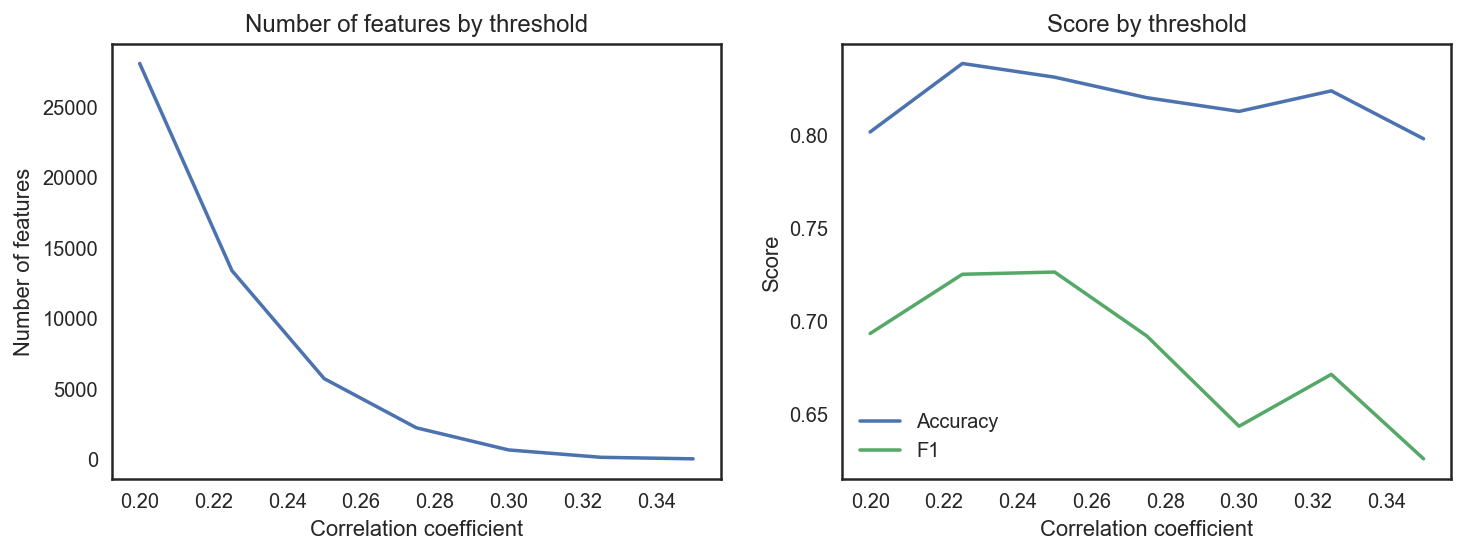

In [135]:
#set each df as X matrix, fit a lasso model and determine accuracy and plot
from sklearn.linear_model import LogisticRegressionCV

total_num=[]
acc_scores=[]
f1_scores=[]
best_Cs=[]

for df in genes_dfs:
    num_new = len(df.columns)-len(genes.columns)
    X = StandardScaler().fit_transform(df)
    lasso = LogisticRegressionCV(penalty="l1", Cs=30, cv=4, solver="liblinear")
    model = lasso.fit(X, y) #finds best C
    best_Cs.append(model.C_[0])
    best_lasso = LogisticRegression(C=model.C_[0], penalty="l1", solver="liblinear")
    model = best_lasso.fit(X, y)
    predictions = cross_val_predict(best_lasso, X, y, cv=4)
    acc = accuracy_score(y, predictions)
    f1 = f1_score(y, predictions)
    total_num.append(num_new)
    acc_scores.append(acc)
    f1_scores.append(f1)

#visualise
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12,4))
ax1.plot(boundaries, total_num)
ax1.set_xlabel("Correlation coefficient")
ax1.set_ylabel("Number of features")
ax1.set_title("Number of features by threshold")
ax2.plot(boundaries, acc_scores, label="Accuracy")
ax2.plot(boundaries, f1_scores, label="F1")
ax2.set_xlabel("Correlation coefficient")
ax2.set_ylabel("Score")
ax2.set_title("Score by threshold")
ax2.legend()
plt.show()

In [138]:
#scores good at threshold of correlation coefficient = 0.225 and 0.25

#store as csv 
thresh_2.to_csv("threshold_0.225.csv", sep=",")
thresh_3.to_csv("threshold_0.25.csv", sep=",")

print(best_Cs[1], best_Cs[2])

(1.3738237958832638, 9.2367085718738657)


In [342]:
#import dataframes with feature interactions at the two thresholds

lower_thresh = pd.read_csv("threshold_0.225.csv", sep=",", index_col="Unnamed: 0")
lower_best_C = 1.374
higher_thresh = pd.read_csv("threshold_0.25.csv", sep=",", index_col="Unnamed: 0")
higher_best_C = 9.237

In [119]:
#asses how they score
from sklearn.metrics import classification_report

lower_X = StandardScaler().fit_transform(lower_thresh)
lower_lasso = LogisticRegression(C=lower_best_C, penalty="l1", solver="liblinear")
lower_model = lower_lasso.fit(lower_X, y)
lower_predictions = cross_val_predict(lower_lasso, lower_X, y, cv=4)
print("Report at lower threshold of correlation coefficient = 0.225")
print(classification_report(y, lower_predictions))

higher_X = StandardScaler().fit_transform(higher_thresh)
higher_lasso = LogisticRegression(C=higher_best_C, penalty="l1", solver="liblinear")
higher_model = higher_lasso.fit(higher_X, y)
higher_predictions = cross_val_predict(higher_lasso, higher_X, y, cv=4)
print("Report at higher threshold of correlation coefficient = 0.25")
print(classification_report(y, higher_predictions))

Report at lower threshold of correlation coefficient = 0.225
             precision    recall  f1-score   support

          0       0.90      0.87      0.89       195
          1       0.70      0.75      0.73        77

avg / total       0.84      0.84      0.84       272

Report at higher threshold of correlation coefficient = 0.25
             precision    recall  f1-score   support

          0       0.91      0.85      0.88       195
          1       0.67      0.79      0.73        77

avg / total       0.84      0.83      0.83       272



In [126]:
#both very good, take a look at higher thershold more in depth
print("baseline accuracy: " + str(0.717))
print("lasso accuracy with gene interactions above threshold coefficient of 0.25: " + str(accuracy_score(y, higher_predictions)))
coefs = pd.DataFrame({"variable": higher_thresh.columns, "coef": higher_lasso.coef_[0]})
print("variables that contribute positively to event death the most: ")
display(coefs.sort_values("coef", ascending=False).head())
print("variables that contribute negatively to event death the most: ")
display(coefs.sort_values("coef", ascending=True).head())
print("number of non-zero coefficients: " + str(coefs[coefs["coef"]!=0].shape[0]))

pickle.dump(higher_model, open("gene_models/logreg.pkl", 'wb'))

baseline accuracy: 0.717
lasso accuracy with gene interactions above threshold coefficient of 0.25: 0.845588235294
variables that contribute positively to event death the most: 


,coef,variable
3029,0.566338,"('nm_001831', 'nm_006868')"
4833,0.529372,"('nm_004585', 'nm_000509')"
2620,0.412040,"('nm_002462', 'nm_000849')"
324,0.349990,nm_020163
4314,0.336207,"('nm_003645', 'ab037848')"


variables that contribute negatively to event death the most: 


,coef,variable
2840,-0.643441,"('nm_002509', 'nm_001254')"
3340,-0.448089,"('nm_003378', 'ak000660')"
7084,-0.424582,"('nm_018407', 'nm_000854')"
1319,-0.351172,al049963
1205,-0.308040,nm_017422


number of non-zero coefficients: 341


#### PCA

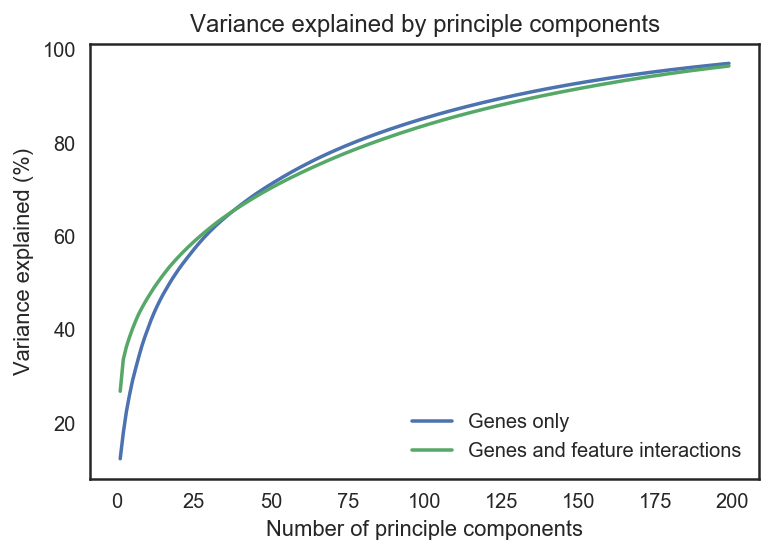

In [152]:
from sklearn.decomposition import PCA
from scipy.stats import zscore

#fit a PCA for normal features and for feature interactions
pca=PCA()
pca.fit(X)
pca_int=PCA()
pca_int.fit(higher_X)

x_vals = range(1,200)
cum_sums = []
cum_sums_int = []
for i in range(1,1500):
    exp_var_ratio = sum(pca.explained_variance_ratio_[:i])
    cum_sums.append(exp_var_ratio*100)
    exp_var_ratio_int = sum(pca_int.explained_variance_ratio_[:i])
    cum_sums_int.append(exp_var_ratio_int*100)
fig, ax = plt.subplots()
ax.plot(x_vals, cum_sums[:199], label="Genes only")
ax.plot(x_vals, cum_sums_int[:199], label="Genes and feature interactions")
ax.set_xlabel("Number of principle components")
ax.set_ylabel("Variance explained (%)")
ax.set_title("Variance explained by principle components")
plt.legend()
plt.show()

#PCs generated using feature interactions compromise just as much variance as those without
#this is expected because PCA takes into account interactions between variables

Shape of transformed components:
(272, 272)
Most important features by vector magnitude:
[(2.371199904665464, 'esr1'), (2.371199904665463, 'nm_000125'), (2.3654857534817197, 'nm_004496'), (2.344967129739587, 'nm_002051'), (2.314953183855217, 'ab020689'), (2.2986392614464997, 'contig53968_rc')]


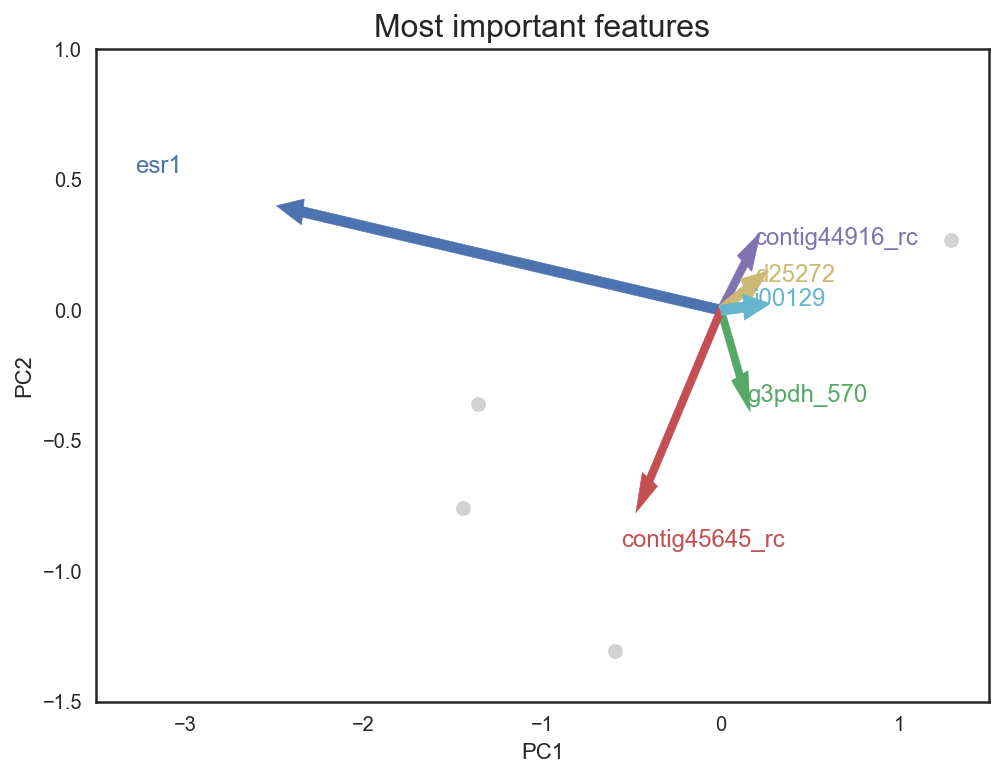

In [153]:
#determine those features that are most important in PCA
import math
pca=PCA(n_components=272)
pca.fit(X)
transformed=pca.fit_transform(X)
print("Shape of transformed components:\n" + str(np.shape(transformed)))

#scale the PC1 and PC2 to the max value in the transformed set
xvector = pca.components_[0] * max(transformed[:,0])
yvector = pca.components_[1] * max(transformed[:,1])

#determine important features as those with larger vector magnitude
important_features = {genes.columns[i]: math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(len(genes.columns))}
important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
print("Most important features by vector magnitude:\n" + str(important_features[:6]))

fig, ax = plt.subplots(figsize=(8,6))

#plot vectors for most important features in the PC1/PC2 space
for i in range(6):
    plt.arrow(0, 0, xvector[i], yvector[i], color=sns.color_palette()[i], width=0.04, head_width=0.1, label=list(genes.columns)[i])
    plt.text(xvector[i]*1.4, yvector[i]*1.4, list(genes.columns)[i], color=sns.color_palette()[i])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Most important features", size=16)
plt.xlim(-3.5,1.5)
plt.ylim(-1.5,1)
plt.scatter(transformed[:,0], transformed[:,1], color="darkgrey", alpha=0.5)
plt.show()

In [149]:
params = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-2,4,100)
}
logreg = LogisticRegression()
gridsearch = GridSearchCV(logreg, params, n_jobs=-1, cv=4)
gridsearch.fit(transformed, y)

print("baseline accuracy: " + str(0.717))
print("PCA accuracy: " + str(gridsearch.best_score_))
print("PCA best params: " + str(gridsearch.best_params_))

best_model = gridsearch.best_estimator_
colnames = ["PC" + str(i) for i in range(1,273)]
coefs = pd.DataFrame({"variable": colnames, "coef": best_model.coef_[0]})
print("PCs that contribute positively to event death the most: ")
display(coefs.sort_values("coef", ascending=False).head())
print("PCs that contribute negatively to event death the most: ")
display(coefs.sort_values("coef", ascending=True).head())
print("number of non-zero PCs: " + str(coefs[coefs["coef"]!=0].shape[0]))

#PCA combined with logistic regression does not improve accuracy to the level that 
#feature interactions do

baseline accuracy: 0.717
PCA accuracy: 0.7205882352941176
PCA best params: {'penalty': 'l1', 'C': 0.06135907273413173}
PCs that contribute positively to event death the most: 


,coef,variable
90,0.145779,PC91
81,0.109189,PC82
151,0.086517,PC152
18,0.075469,PC19
202,0.065192,PC203


PCs that contribute negatively to event death the most: 


,coef,variable
105,-0.081603,PC106
12,-0.081179,PC13
46,-0.062817,PC47
36,-0.061032,PC37
44,-0.059528,PC45


number of non-zero PCs: 49


#### SVM

In [34]:
from sklearn import svm
params = {
    "C": np.logspace(-2,2,15),
    "kernel": ["linear", "poly", "rbf"],
    "gamma": np.logspace(-5,2,15),
    "degree": [3]
}
#using just gene features
clf = svm.SVC(probability=True)
gridsearch = GridSearchCV(clf, params, n_jobs=-1, cv=4)
gridsearch.fit(X, y)
pickle.dump(gridsearch.best_estimator_, open("gene_models/SVM.pkl", 'wb'))

#using genes and feature interactions
clf = svm.SVC(probability=True)
gridsearch_int = GridSearchCV(clf, params, n_jobs=-1, cv=4)
gridsearch_int.fit(higher_X, y)
pickle.dump(gridsearch_int.best_estimator_, open("gene_models/SVM_int.pkl", 'wb'))

print("baseline accuracy: " + str(0.717))
print("SVM accuracy: " + str(gridsearch.best_score_))
print("best params: " + str(gridsearch.best_params_))
print("SVM accuracy with added feature interactions: " + str(gridsearch_int.best_score_))
print("best params with feature interactions: " + str(gridsearch_int.best_params_))

baseline accuracy: 0.717
SVM accuracy: 0.7316176470588235
best params: {'kernel': 'rbf', 'C': 3.727593720314938, 'gamma': 0.001, 'degree': 3}
SVM accuracy with added feature interactions: 0.8419117647058824
best params with feature interactions: {'kernel': 'rbf', 'C': 51.794746792312075, 'gamma': 1e-05, 'degree': 3}


#### SVM vs logistic regression

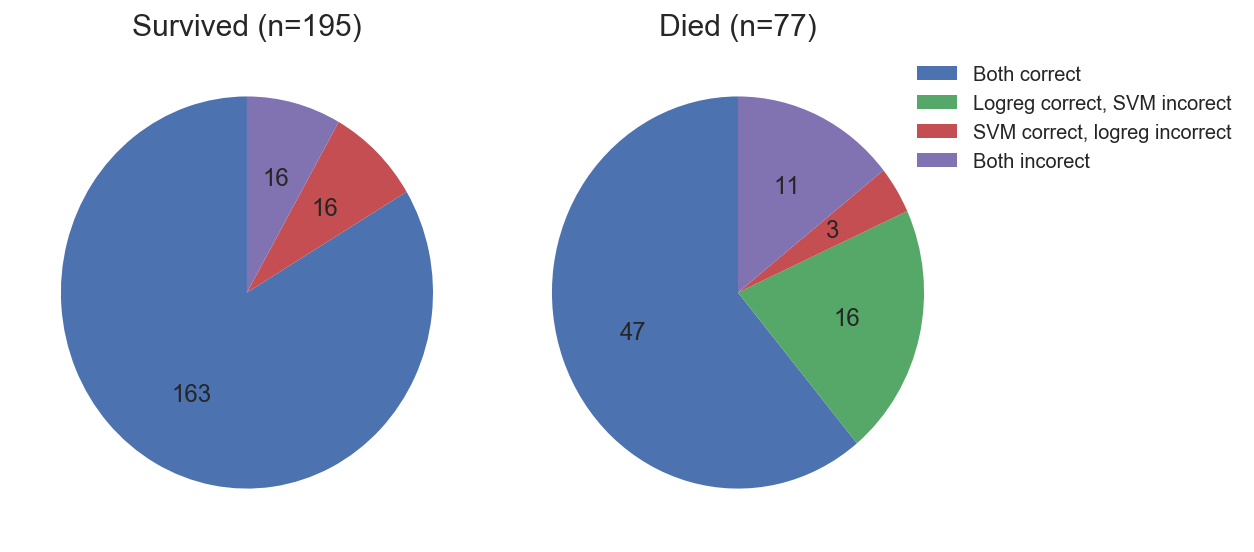

In [306]:
#are these models classifying the same individuals correctly
preds_logreg = cross_val_predict(gene_logreg, higher_X, y, cv=4)
preds_svm = cross_val_predict(gene_SVM, higher_X, y, cv=4)
results = pd.DataFrame({"actual":y, "logreg":preds_logreg, "svm":preds_svm})

#plot pie charts determining the amount of overlap between model predictions
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(7,4))

for i, ax, title in zip([0,1],[ax1, ax2],["Survived (n=195)", "Died (n=77)"]):
    subset = results[results["actual"]==i]
    both_correct = subset[np.logical_and(subset["logreg"]==i, subset["svm"]==i)].shape[0]
    only_logreg = subset[np.logical_and(subset["logreg"]==i, subset["svm"]!=i)].shape[0]
    only_svm = subset[np.logical_and(subset["logreg"]!=i, subset["svm"]==i)].shape[0]
    neither = subset[np.logical_and(subset["logreg"]!=i, subset["svm"]!=i)].shape[0]
    sizes = [both_correct, only_logreg, only_svm, neither]
    labels = ["Both correct", "Logreg correct, SVM incorect", "SVM correct, logreg incorrect", "Both incorect"]
    colors = [sns.color_palette()[c] for c in range(0,4)]
    total=sum(sizes)
    ax.pie(sizes, colors=colors, 
           autopct=lambda(p):('{:.0f}'.format(p*total/100)) if p>0 else "", 
           shadow=False, startangle=90)
    ax.set_title(title, size=15)
    if ax == ax2:
        lgd = ax.legend(labels=labels, loc="upper right", bbox_to_anchor=(1.6,1))

plt.tight_layout()
plt.savefig("visuals/modelling_SVM_logreg_pies.jpeg", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### Decision Tree

In [154]:
y = subset["eventdeath"]
X = genes.copy() #use dataframe of genes subset 
X = StandardScaler().fit_transform(X)

In [129]:
#partitioning in decision tree captures interaction and quadratic effects by default
#so no need to use the larger dataframe of interactions
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 20),
    "max_features": [None, "sqrt", "log2", 2,3,4,5],
    "min_samples_split": [2,3,4,5,10,15,20,25,30,40,50],
    "min_samples_leaf": [1,2,3]
}
tree = DecisionTreeClassifier()
gridsearch = GridSearchCV(tree, params, n_jobs=-1, cv=4)
gridsearch.fit(X, y)
pickle.dump(gridsearch.best_estimator_, open("gene_models/tree.pkl", 'wb'))

print("baseline accuracy: " + str(0.717))
print("decision tree accuracy: " + str(gridsearch.best_score_))
print("best params: " + str(gridsearch.best_params_))

best_model = gridsearch.best_estimator_
importances = pd.DataFrame({"feature": genes.columns, "importance": best_model.feature_importances_})
display(importances[importances["importance"]!=0].sort_values("importance", ascending=False).head())
print("number of important (non zero) features: " + str(importances[importances["importance"]!=0].shape[0]))

baseline accuracy: 0.717
decision tree accuracy: 0.768382352941
best params: {'max_features': 'log2', 'min_samples_split': 20, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2}


,feature,importance
665,nm_005342,0.458770
1306,al049932,0.383012
819,nm_014321,0.158219


number of important (non zero) features: 3


#### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

params = {"criterion": ["gini", "entropy"], 
            "n_estimators": [100, 200, 300],
            "max_depth": range(10,30,2),
            "max_features": [50, 100, 150],
            "min_samples_split" : [5, 15, 25],
            "min_samples_leaf" : [5, 10, 20]}

forest = RandomForestClassifier()
gridsearch = GridSearchCV(forest, params, n_jobs=-1, cv=4)
gridsearch.fit(X, y)

print("baseline accuracy: " + str(0.717))
print("gridsearch random forest score: " + str(gridsearch.best_score_))
print("best params: " + str(gridsearch.best_params_))

#random forest does not increase accuracy compared to decision tree

baseline accuracy: 0.717
gridsearch random forest score: 0.75
best params: {'min_samples_leaf': 5, 'n_estimators': 300, 'min_samples_split': 5, 'criterion': 'gini', 'max_features': 100, 'max_depth': 12}


#### KNN

In [131]:
#only use original gene features as KNN sensitive to curse of overfitting/curse of dimensionality
params = {
    "n_neighbors" : [1,5,10,15,20,25,30,35,40],
    "weights" : ["uniform" , "distance"]
}
knn = KNeighborsClassifier()
gridsearch = GridSearchCV(knn, params, n_jobs=-1, cv=4)
gridsearch.fit(X, y)
pickle.dump(gridsearch.best_estimator_, open("gene_models/KNN.pkl", 'wb'))

print("baseline accuracy: " + str(0.717))
print("KNN accuracy: " + str(gridsearch.best_score_))
print("best params: " + str(gridsearch.best_params_))

baseline accuracy: 0.717
KNN accuracy: 0.727941176471
best params: {'n_neighbors': 35, 'weights': 'uniform'}


<a name="section4.3"></a>
### 4.3 Using clinical variables and gene expression

In [298]:
#combine predictive clinical variables with gene interaction features
combined = pd.concat((predictive_df, higher_thresh), axis=1)
X = StandardScaler().fit_transform(combined)
y = subset["eventdeath"]

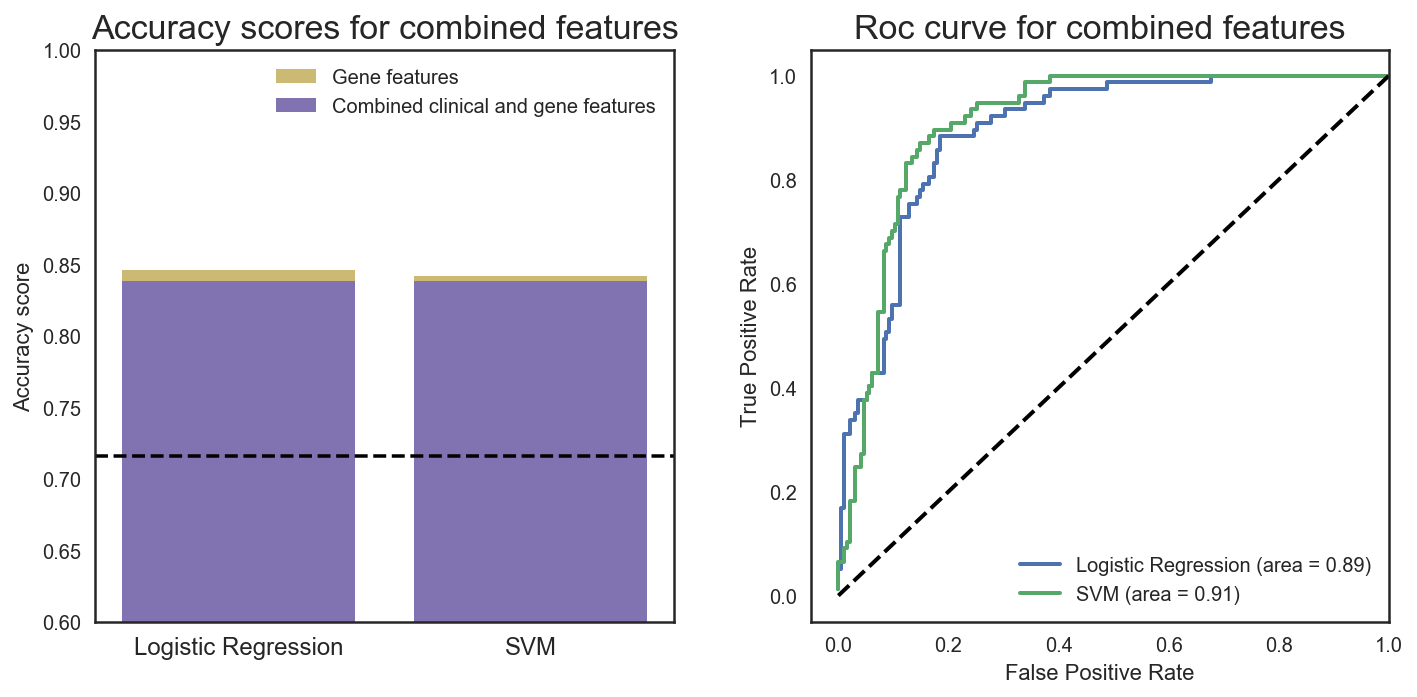

In [300]:
#visual summary
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,5))

#bar chart of accuracy scores
inds = range(1,3)
labels = ["Logistic Regression", "SVM"]
scores_genes = [0.846, 0.842]
scores_combined = [0.838, 0.838]
ax1.bar(inds, scores_genes, width=0.8, color=sns.color_palette()[4], label="Gene features")
ax1.bar(inds, scores_combined, width=0.8, color=sns.color_palette()[3], label="Combined clinical and gene features")
ax1.set_ylim(0.6, 1)
ax1.set_ylabel("Accuracy score")
ax1.axhline(0.716, color="black", linestyle="--")
ax1.set_title("Accuracy scores for combined features", fontsize=17)
ax1.set_xticks(range(1,3))
ax1.set_xticklabels(labels, size=12)
ax1.legend()

#load models and generate prediction probabilities
combined_logreg = pickle.load(open("combined_models/logreg.pkl", "r"))
combined_svm = pickle.load(open("combined_models/SVM.pkl", "r"))
pp_combined_logreg = cross_val_predict(combined_logreg, X, y, cv=4, method="predict_proba")
pp_combined_svm = cross_val_predict(combined_svm, X, y, cv=4, method="predict_proba")

#plot roc curve
labels = ["Logistic Regression", "SVM"]
for label, pp in zip(labels, [pp_combined_logreg, pp_combined_svm]):
    fpr, tpr, threshold = roc_curve(y, pp[:,1])
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label=label+' (area = %0.2f)' % roc_auc, linewidth=2)
ax2.plot([0, 1], [0, 1], 'k--', linewidth=2)
ax2.set_xlim([-0.05, 1.0])
ax2.set_ylim([-0.05, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.legend(loc="lower right")
ax2.set_title("Roc curve for combined features", fontsize=17)
plt.tight_layout()
plt.savefig("visuals/models_combined.jpeg")
plt.show()

#### Logistic Regression

In [140]:
params = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-2,4,100)
}
logreg = LogisticRegression()
gridsearch = GridSearchCV(logreg, params, n_jobs=-1, cv=4)
gridsearch.fit(X, y)

print("baseline accuracy: " + str(0.717))
print("logreg accuracy: " + str(gridsearch.best_score_))
print("logreg best params: " + str(gridsearch.best_params_))

best_model = gridsearch.best_estimator_
pickle.dump(gridsearch.best_estimator_, open("combined_models/logreg.pkl", 'wb'))
coefs = pd.DataFrame({"variable": combined.columns, "coef": best_model.coef_[0]})
print("variables that contribute positively to event death the most: ")
display(coefs.sort_values("coef", ascending=False).head())
print("variables that contribute negatively to event death the most: ")
display(coefs.sort_values("coef", ascending=True).head())
print("number of non-zero coefficients: " + str(coefs[coefs["coef"]!=0].shape[0]))

baseline accuracy: 0.717
logreg accuracy: 0.8382352941176471
logreg best params: {'penalty': 'l1', 'C': 8.111308307896872}
variables that contribute positively to event death the most: 


,coef,variable
3044,0.557220,"('nm_001831', 'nm_006868')"
4848,0.457206,"('nm_004585', 'nm_000509')"
2635,0.418013,"('nm_002462', 'nm_000849')"
4329,0.382749,"('nm_003645', 'ab037848')"
4628,0.377268,"('nm_012467', 'nm_006419')"


variables that contribute negatively to event death the most: 


,coef,variable
7099,-0.470801,"('nm_018407', 'nm_000854')"
3355,-0.469999,"('nm_003378', 'ak000660')"
6625,-0.451606,"('nm_016359', 'nm_000695')"
2855,-0.393699,"('nm_002509', 'nm_001254')"
1334,-0.390243,al049963


number of non-zero coefficients: 310


Contributing clinical features:
angioinv_3 (coefficient: 0.232)
lymphinfil_1 (coefficient: 0.002)


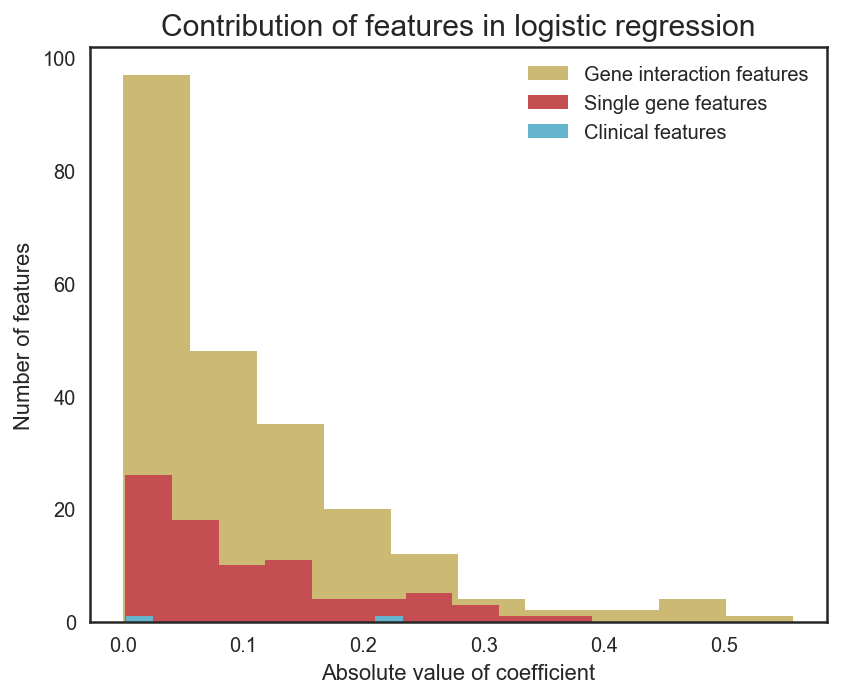

In [312]:
#investigate features with non zero coefficient more
coefs = pd.DataFrame({"variable": combined.columns, "coef": combined_logreg.coef_[0]})
coefs["abs_coef"] = coefs["coef"].abs()
non_zero = coefs[coefs["coef"]!=0]

#generate subsets for each type of contributing variable
clinical = non_zero[non_zero["variable"].isin(predictive_df.columns)]
print("Contributing clinical features:")
for var, coef in zip(clinical.variable, clinical.coef):
    print(str(var) + " (coefficient: " + str(round(coef,3)) + str(")"))
single_genes = non_zero[np.logical_and(~non_zero["variable"].isin(predictive_df.columns), 
                                       ~non_zero["variable"].str.contains(","))]
interaction_genes = non_zero[non_zero["variable"].str.contains(",")]

#plot histograms for each type
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(interaction_genes.abs_coef, alpha=1, color=sns.color_palette()[4], label="Gene interaction features")
ax.hist(single_genes.abs_coef, alpha=1, color=sns.color_palette()[2], label="Single gene features")
ax.hist(clinical.abs_coef, alpha=1, color=sns.color_palette()[5], label="Clinical features")
ax.set_title("Contribution of features in logistic regression", size=15)
ax.set_xlabel("Absolute value of coefficient")
ax.set_ylabel("Number of features")
plt.legend()
plt.tight_layout()
plt.savefig("visuals/models_logreg_contribution.jpeg")
plt.show()

#### SVM

In [150]:
from sklearn import svm
params = {
    "C": np.logspace(-2,2,15),
    "kernel": ["linear", "poly", "rbf"],
    "gamma": np.logspace(-5,2,15),
    "degree": [3]
}
clf = svm.SVC(probability=True)
gridsearch = GridSearchCV(clf, params, n_jobs=-1, cv=4)
gridsearch.fit(X, y)
pickle.dump(gridsearch.best_estimator_, open("combined_models/SVM.pkl", 'wb'))

print("baseline accuracy: " + str(0.717))
print("SVM accuracy: " + str(gridsearch.best_score_))
print("best params: " + str(gridsearch.best_params_))

baseline accuracy: 0.717
SVM accuracy: 0.8382352941176471
best params: {'kernel': 'rbf', 'C': 51.794746792312075, 'gamma': 1e-05, 'degree': 3}


<a name="section5"></a>
### 5: Visualisation

In [118]:
#create custom 1-D lens with isolation forest
model = IsolationForest(random_state=1)
model.fit(X)
lens1 = model.decision_function(X).reshape((X.shape[0], 1))

#create another 1-D lens with l2-norm
mapper = km.KeplerMapper(verbose=0)
lens2 = mapper.fit_transform(X, projection="l2norm", scaler=None)

#combine lenses to create a 2-D [isolation forest, L^2-Norm] lens
lens = np.c_[lens1, lens2]

#create the simplicial complex
network = mapper.map(lens, X, nr_cubes=15, overlap_perc=0.4, 
                    clusterer=KMeans(n_clusters=2,random_state=1))

#visualise
inverse_y = [0 if val==1 else 1 for val in y] #so clusters with higher death rate are red
mapper.visualize(network, path_html="clustering_visualisation.html",title="Breast Cancer Gene Clustering",
                custom_tooltips=pd.Series(inverse_y), color_function="average_signal_cluster")

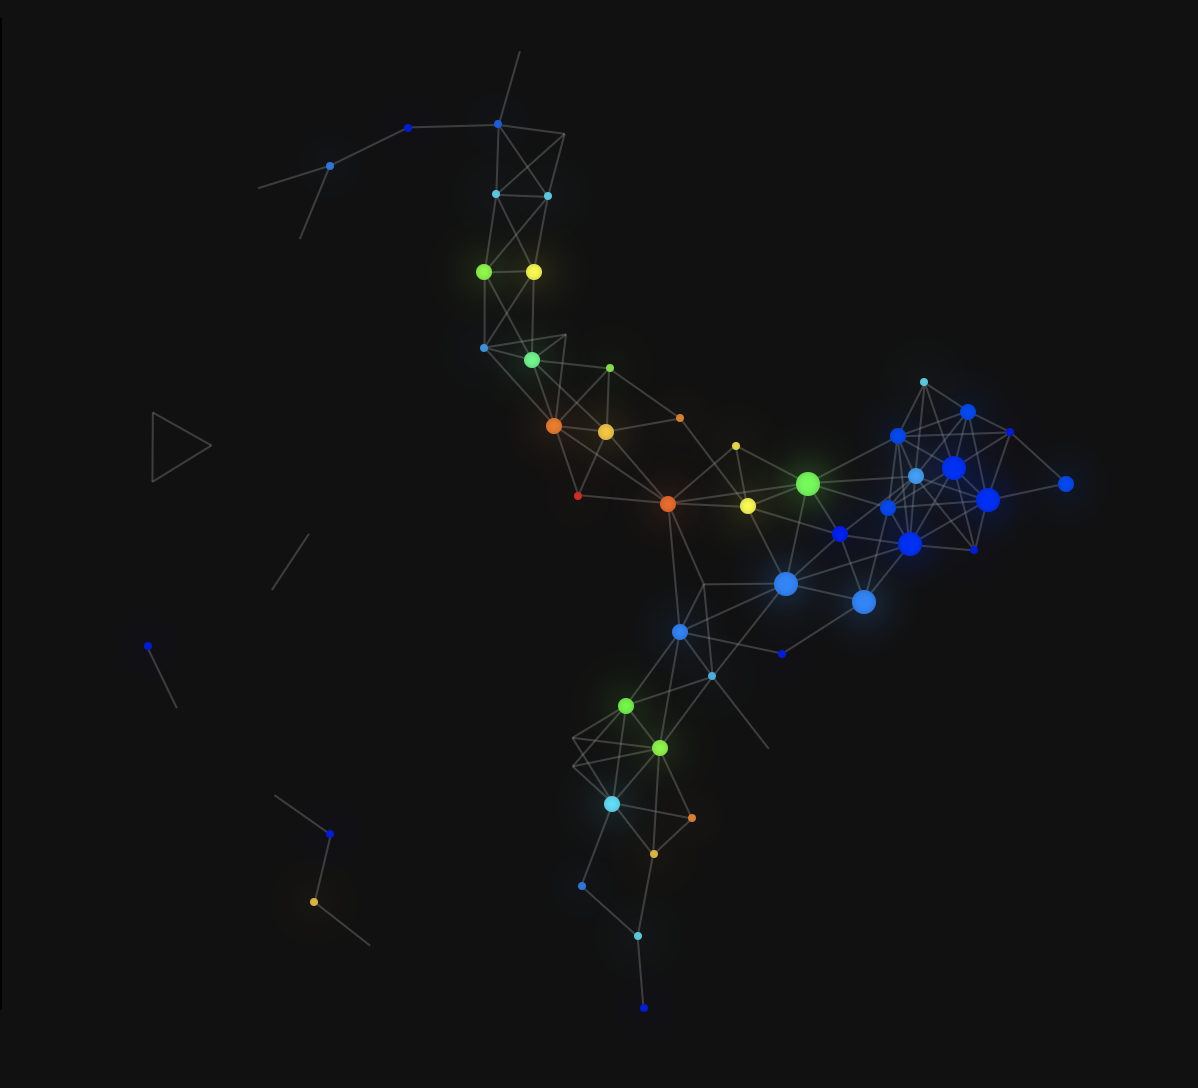

In [180]:
#interactive output saved as html document, static looks like this

from IPython.display import Image
Image("keplermapper.png")